In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bambili = pd.read_csv('Bambili_IrrPT.csv')
bambili.head()

date  Temperature  humudity  irradiance  potential  wind speed
0  19500101       20.300    73.536      637.50     4.3901     0.23750
1  19500102       20.352    73.225      837.50     4.2901     0.26750
2  19500103       20.654    75.678      791.67     4.0553     0.47449
3  19500104       21.388    73.610      850.00     4.3541     0.44123
4  19500105       21.435    74.990      841.67     4.3115     0.35958

In [4]:
bamenda = pd.read_csv('Bamenda_IrrPT.csv')
bamenda.head()

Date  Temperature  Humidity  Irradiance  potential  Wind_Speed
0  19500101       19.575    74.585      854.33     4.3880     0.19861
1  19500102       19.875    74.985      833.33     4.2688     0.19761
2  19500103       20.137    78.083      779.17     3.9913     0.53274
3  19500104       21.037    74.749      841.67     4.3115     0.32011
4  19500105       21.013    76.081      825.00     4.2261     0.12056

In [5]:
boufassam = pd.read_csv('Boufassam_IrrPT.csv')
boufassam.head()

date  Temperature  humudity  irradiance  potential  wind speed
0  19500101       22.384    77.513      805.17     4.1294     0.12452
1  19500102       22.184    76.513      804.17     4.1194     0.13452
2  19500103       22.724    78.124      779.17     3.9913     0.20164
3  19500104       23.304    77.783      829.17     4.2474     0.41398
4  19500105       23.220    78.819      816.67     4.1834     0.43339

In [6]:
yaounde = pd.read_csv('yaounde_IrrPT.csv')
yaounde.head()

date  Temperature  humudity  irradiance  potential  wind speed
0  19500101       24.545    89.632      650.83     3.3640      1.5157
1  19500102       24.945    86.632      670.83     3.4364      1.8157
2  19500103       24.234    91.133      641.67     3.2870      2.0908
3  19500104       25.402    87.938      687.50     3.5217      1.8240
4  19500105       25.242    89.361      679.17     3.4791      2.2644

In [7]:
def clean_by_date_mean(df, location_name):
    # Step 1: Normalize column names
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

    # Step 2: Rename known typos
    df = df.rename(columns={
        'humudity': 'humidity',
        'wind_speed_': 'wind_speed',
        'wind speed': 'wind_speed',
        'date': 'date',
        'Date': 'date',
        'irradiance': 'irradiance',
        'Irradiance': 'irradiance',
        'temperature': 'temperature',
        'Temperature': 'temperature',
        'humidity': 'humidity',
        'wind_speed': 'wind_speed',
        'potential': 'potential'
    })

    # Step 3: Drop rows with missing values
    df = df.dropna(subset=['date', 'irradiance'])

    # Step 3: Group by date (as-is), average all other columns
    grouped = df.groupby('date').agg({
        'irradiance': 'mean',
        'temperature': 'mean',
        'humidity': 'mean',
        'wind_speed': 'mean',
        'potential': 'mean'
    }).reset_index()

    # Step 4: Add location label
    grouped['location'] = location_name
    return grouped


In [8]:
bamenda = clean_by_date_mean(bamenda, 'Bamenda')
bamenda.head()

date  irradiance  temperature  humidity  wind_speed  potential location
0  19500101      854.33       19.575    74.585     0.19861     4.3880  Bamenda
1  19500102      833.33       19.875    74.985     0.19761     4.2688  Bamenda
2  19500103      779.17       20.137    78.083     0.53274     3.9913  Bamenda
3  19500104      841.67       21.037    74.749     0.32011     4.3115  Bamenda
4  19500105      825.00       21.013    76.081     0.12056     4.2261  Bamenda

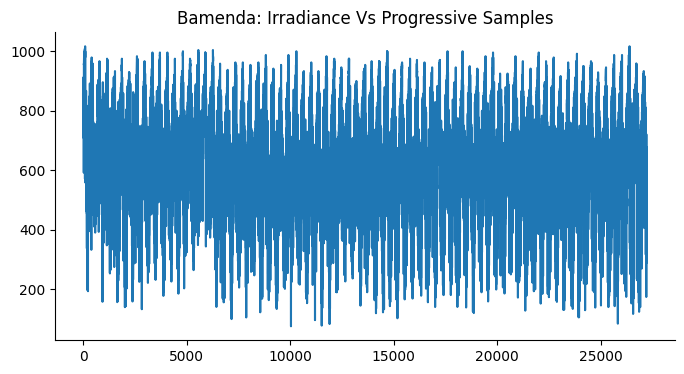

In [9]:
bamenda['irradiance'].plot(kind='line', figsize=(8, 4), title='Bamenda: Irradiance Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

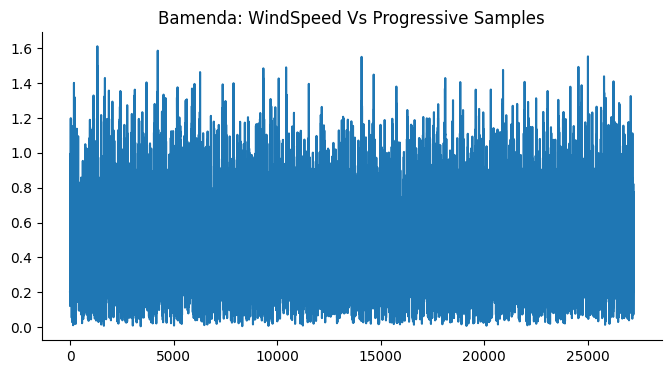

In [10]:
bamenda['wind_speed'].plot(kind='line', figsize=(8, 4), title='Bamenda: WindSpeed Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

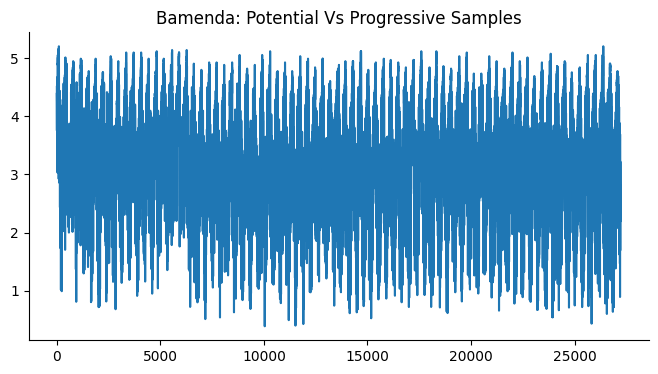

In [11]:
bamenda['potential'].plot(kind='line', figsize=(8, 4), title='Bamenda: Potential Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

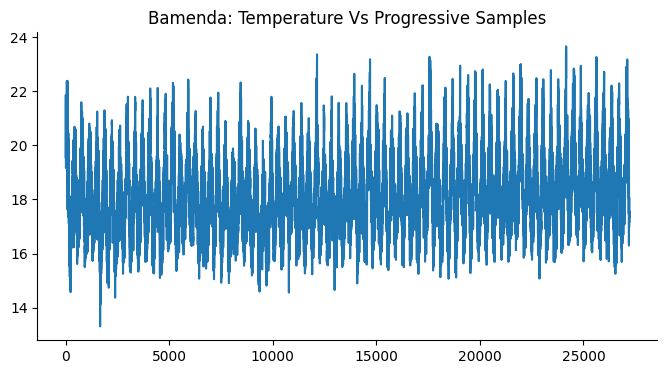

In [12]:
bamenda['temperature'].plot(kind='line', figsize=(8, 4), title='Bamenda: Temperature Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

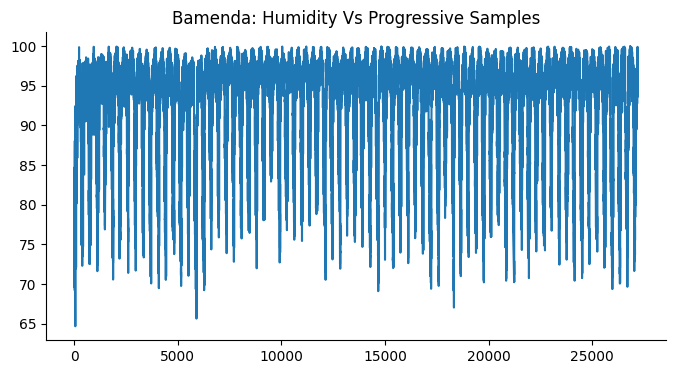

In [13]:
bamenda['humidity'].plot(kind='line', figsize=(8, 4), title='Bamenda: Humidity Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

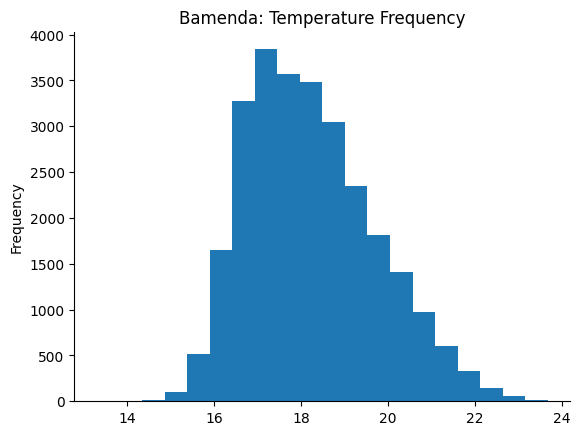

In [14]:
bamenda['temperature'].plot(kind='hist', bins=20, title='Bamenda: Temperature Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

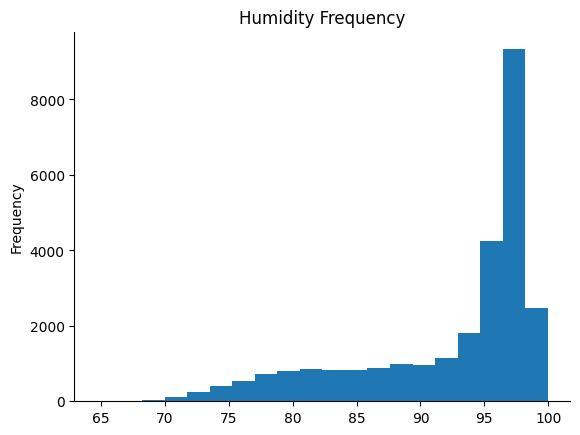

In [15]:
bamenda['humidity'].plot(kind='hist', bins=20, title='Humidity Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

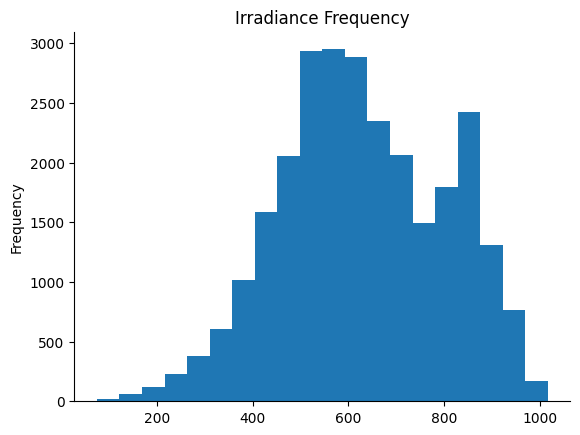

In [16]:
bamenda['irradiance'].plot(kind='hist', bins=20, title='Irradiance Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)


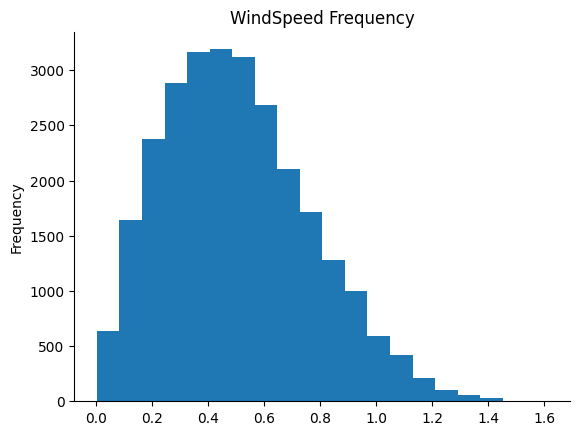

In [17]:
bamenda['wind_speed'].plot(kind='hist', bins=20, title='WindSpeed Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

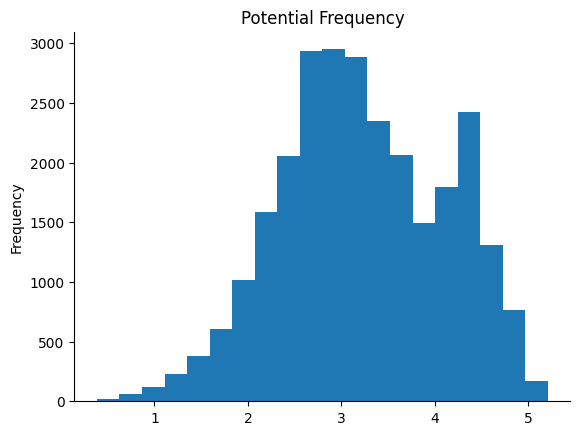

In [18]:
bamenda['potential'].plot(kind='hist', bins=20, title='Potential Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

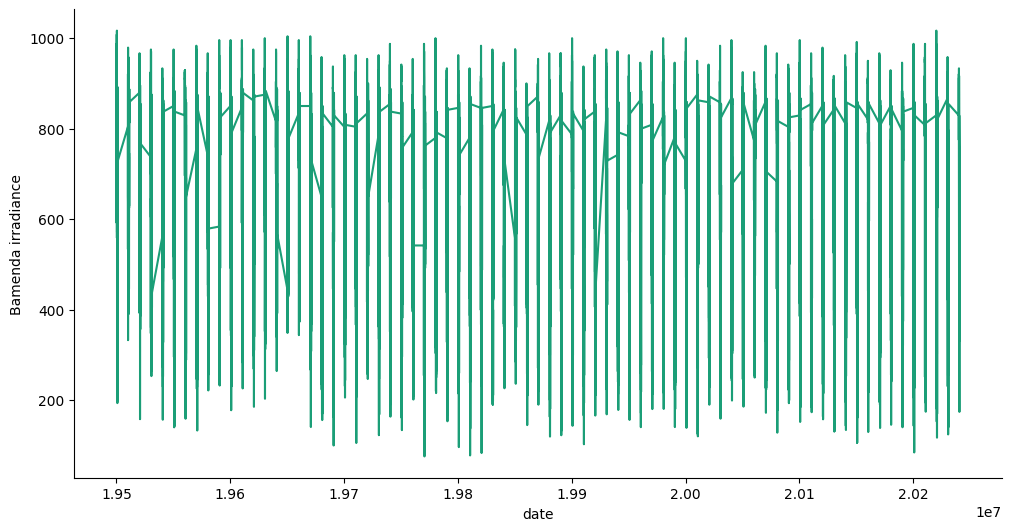

In [19]:
def _plot_series(series, series_name, axislabel, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series[axislabel]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = bamenda.sort_values('date', ascending=True)
_plot_series(df_sorted, '', 'irradiance', 0)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bamenda irradiance')

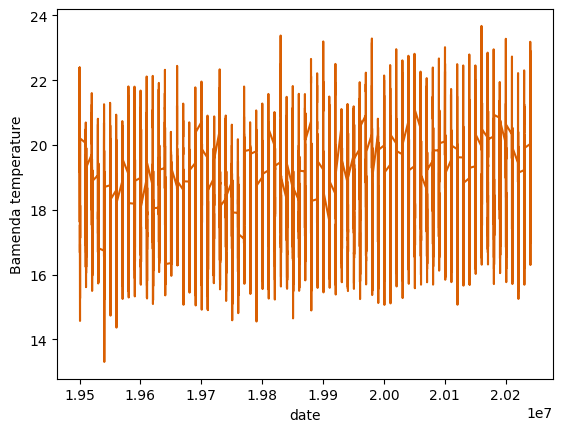

In [20]:
_plot_series(df_sorted, '', 'temperature', 1)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bamenda temperature')

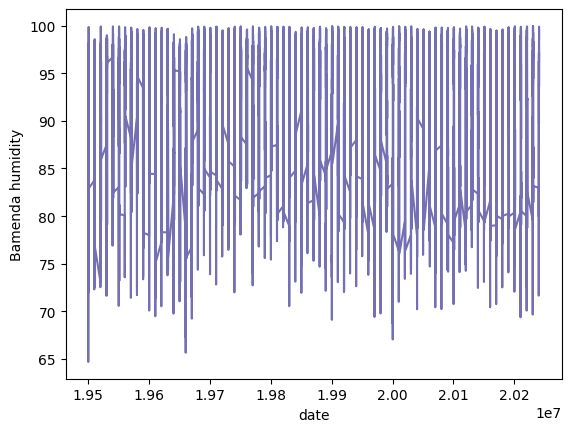

In [21]:
_plot_series(df_sorted, '', 'humidity', 2)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bamenda humidity')

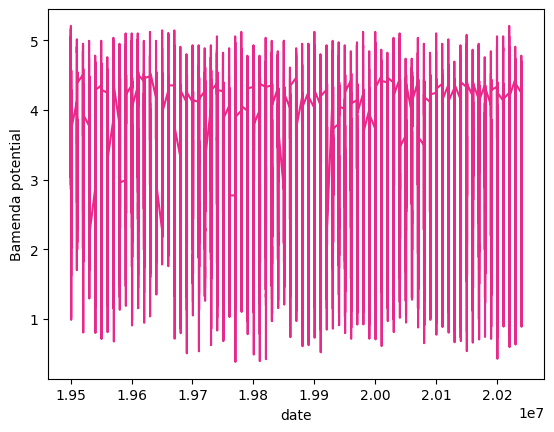

In [22]:
_plot_series(df_sorted, '', 'potential', 3)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bamenda potential')

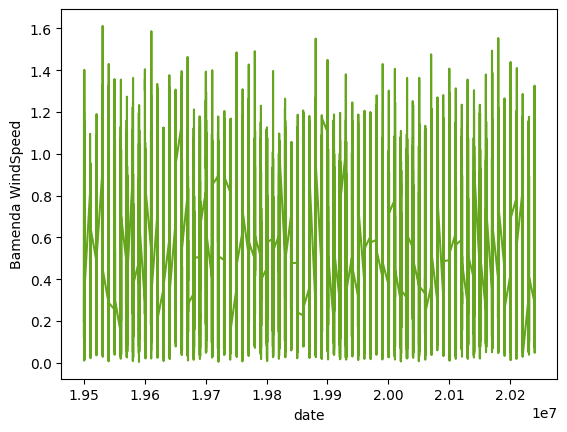

In [23]:
_plot_series(df_sorted, '', 'wind_speed', 4)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bamenda WindSpeed')

In [24]:
bambili = clean_by_date_mean(bambili, 'Bambili')
bambili.head()

date  irradiance  temperature  humidity  wind_speed  potential location
0  19500101      637.50       20.300    73.536     0.23750     4.3901  Bambili
1  19500102      837.50       20.352    73.225     0.26750     4.2901  Bambili
2  19500103      791.67       20.654    75.678     0.47449     4.0553  Bambili
3  19500104      850.00       21.388    73.610     0.44123     4.3541  Bambili
4  19500105      841.67       21.435    74.990     0.35958     4.3115  Bambili

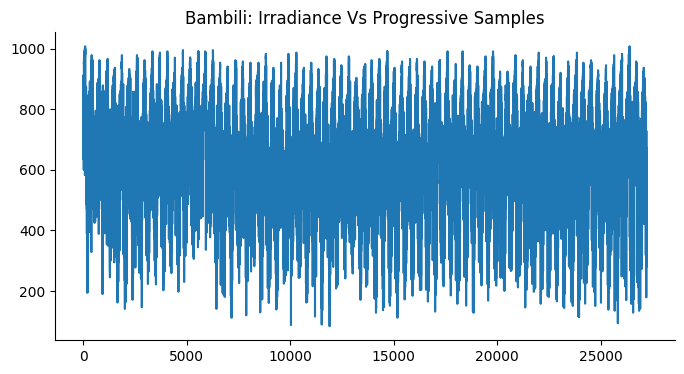

In [25]:
bambili['irradiance'].plot(kind='line', figsize=(8, 4), title='Bambili: Irradiance Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

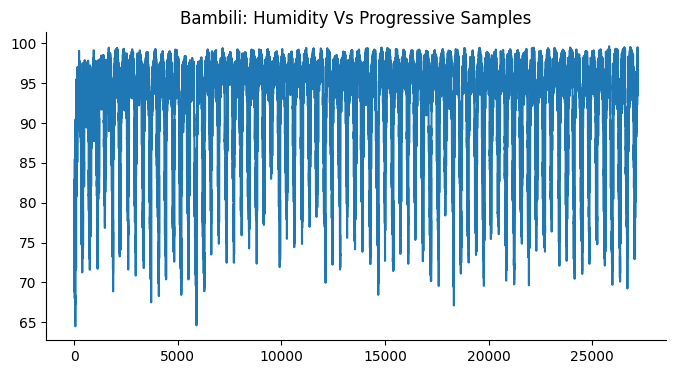

In [26]:
bambili['humidity'].plot(kind='line', figsize=(8, 4), title='Bambili: Humidity Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

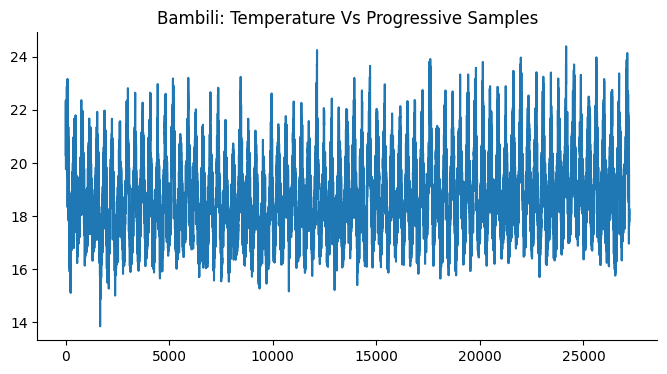

In [27]:
bambili['temperature'].plot(kind='line', figsize=(8, 4), title='Bambili: Temperature Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

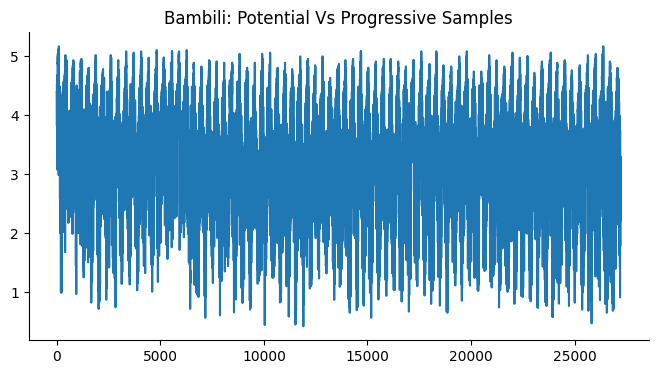

In [28]:
bambili['potential'].plot(kind='line', figsize=(8, 4), title='Bambili: Potential Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

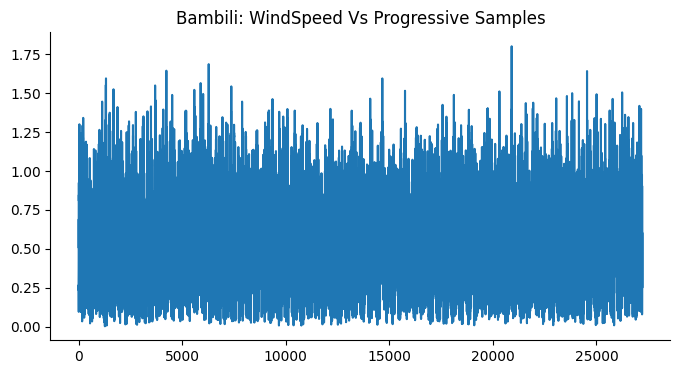

In [29]:
bambili['wind_speed'].plot(kind='line', figsize=(8, 4), title='Bambili: WindSpeed Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

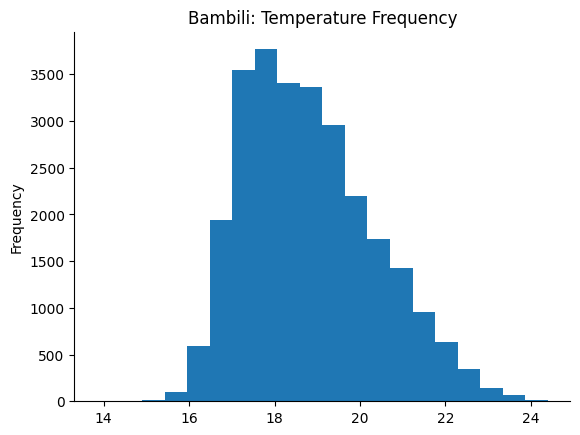

In [30]:
bambili['temperature'].plot(kind='hist', bins=20, title='Bambili: Temperature Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

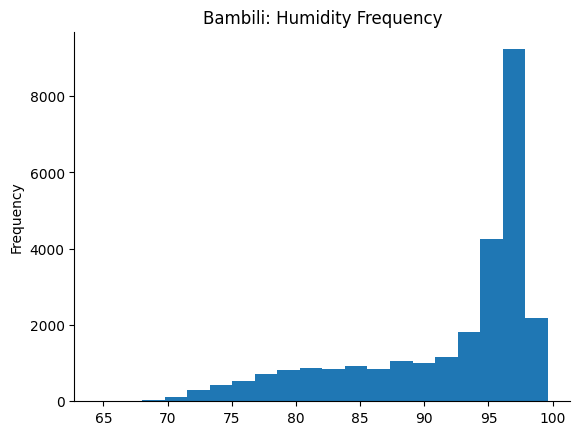

In [31]:
bambili['humidity'].plot(kind='hist', bins=20, title='Bambili: Humidity Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

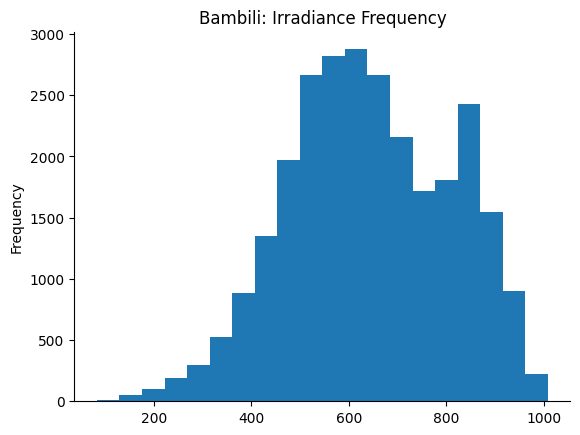

In [32]:
bambili['irradiance'].plot(kind='hist', bins=20, title='Bambili: Irradiance Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

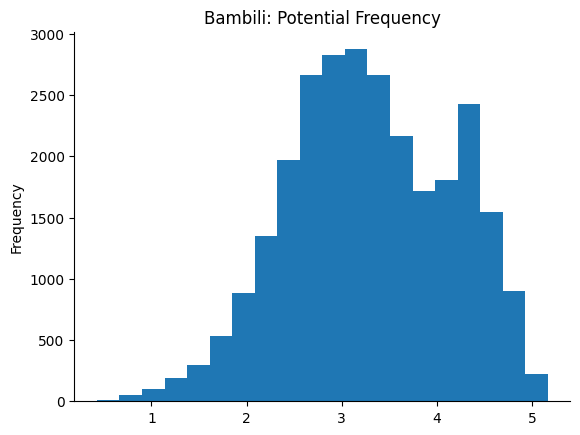

In [33]:
bambili['potential'].plot(kind='hist', bins=20, title='Bambili: Potential Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

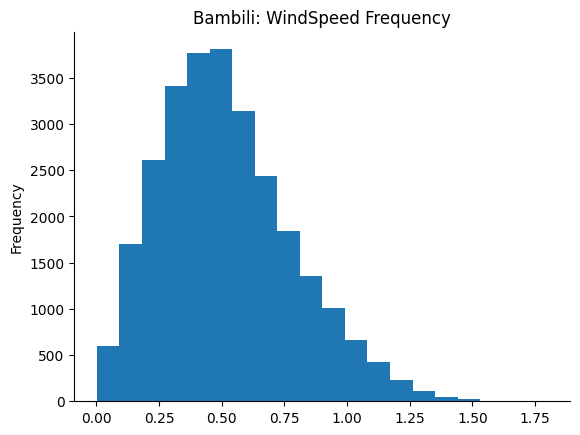

In [34]:
bambili['wind_speed'].plot(kind='hist', bins=20, title='Bambili: WindSpeed Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

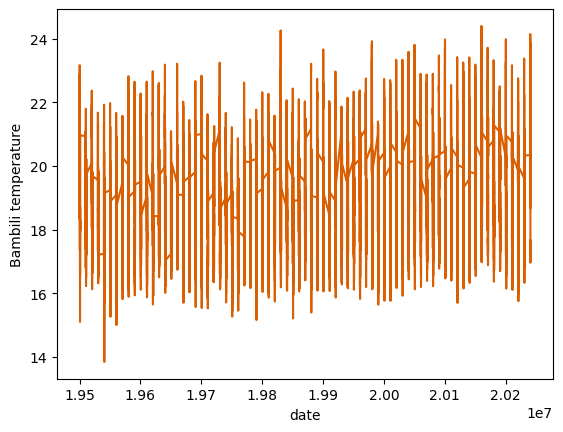

In [35]:
_plot_series(bambili.sort_values('date', ascending=True), '', 'temperature', 1)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bambili temperature')

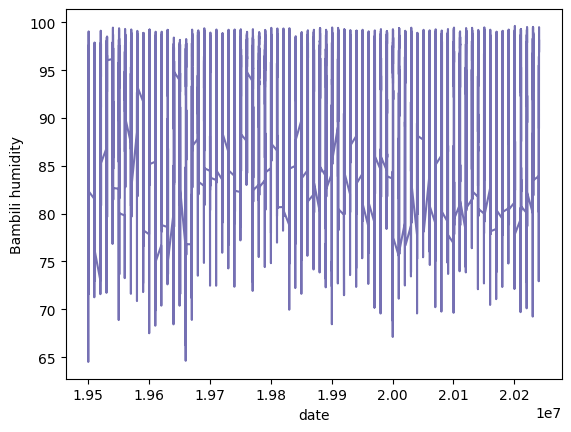

In [36]:
_plot_series(bambili.sort_values('date', ascending=True), '', 'humidity', 2)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bambili humidity')

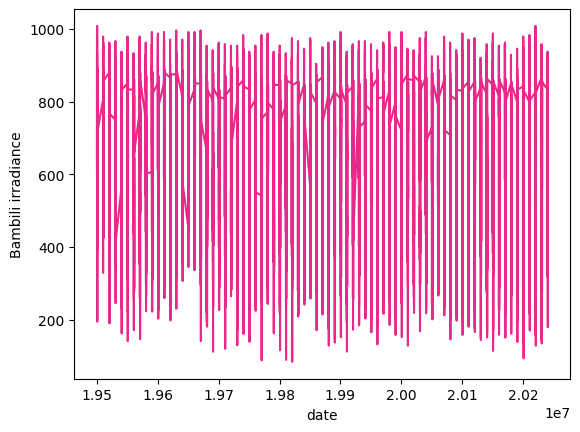

In [37]:
_plot_series(bambili.sort_values('date', ascending=True), '', 'irradiance', 3)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bambili irradiance')

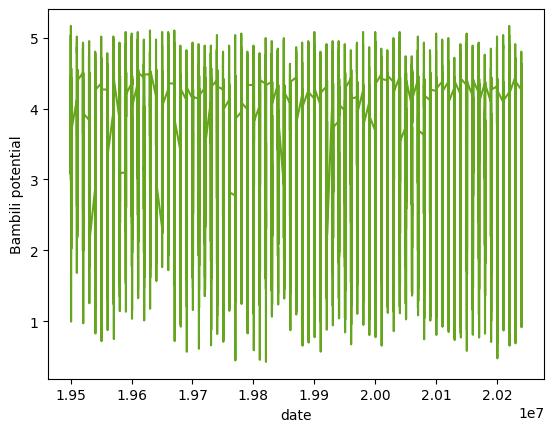

In [38]:
_plot_series(bambili.sort_values('date', ascending=True), '', 'potential', 4)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bambili potential')

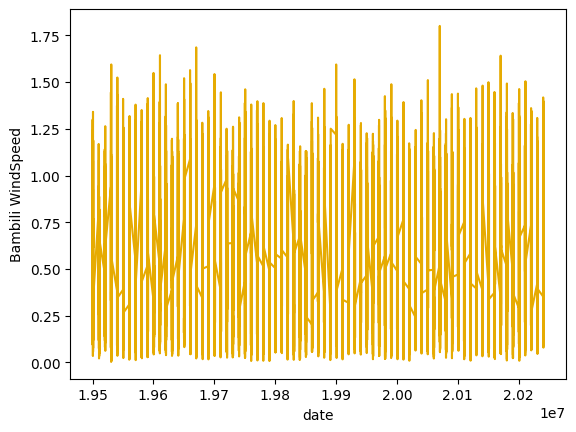

In [39]:
_plot_series(bambili.sort_values('date', ascending=True), '', 'wind_speed', 5)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bambili WindSpeed')

In [40]:
boufassam = clean_by_date_mean(boufassam, 'Boufassam')
boufassam.head()

date  irradiance  temperature  humidity  wind_speed  potential  \
0  19500101      805.17       22.384    77.513     0.12452     4.1294   
1  19500102      804.17       22.184    76.513     0.13452     4.1194   
2  19500103      779.17       22.724    78.124     0.20164     3.9913   
3  19500104      829.17       23.304    77.783     0.41398     4.2474   
4  19500105      816.67       23.220    78.819     0.43339     4.1834   

    location  
0  Boufassam  
1  Boufassam  
2  Boufassam  
3  Boufassam  
4  Boufassam

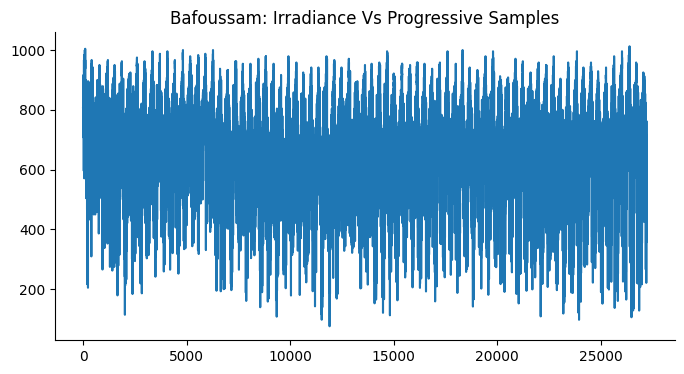

In [41]:
boufassam['irradiance'].plot(kind='line', figsize=(8, 4), title='Bafoussam: Irradiance Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

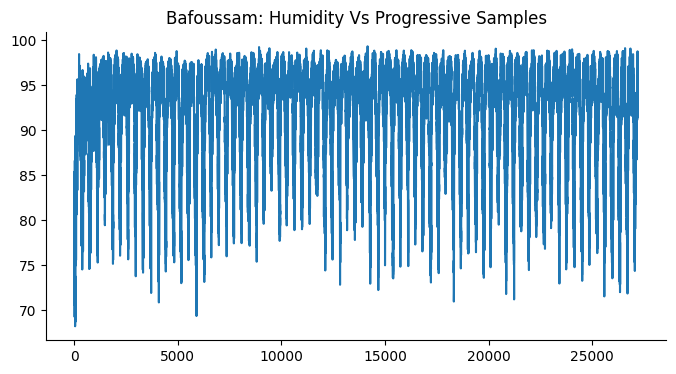

In [42]:
boufassam['humidity'].plot(kind='line', figsize=(8, 4), title='Bafoussam: Humidity Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

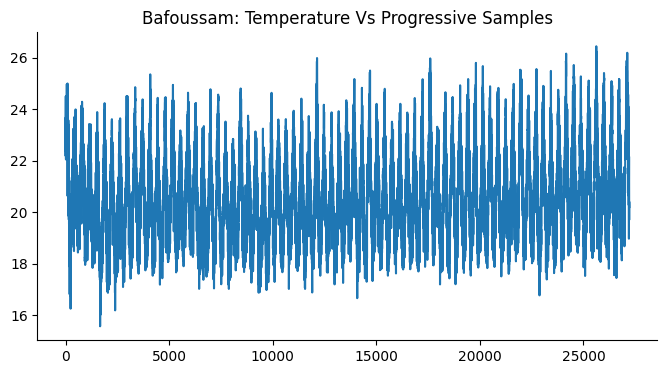

In [43]:
boufassam['temperature'].plot(kind='line', figsize=(8, 4), title='Bafoussam: Temperature Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

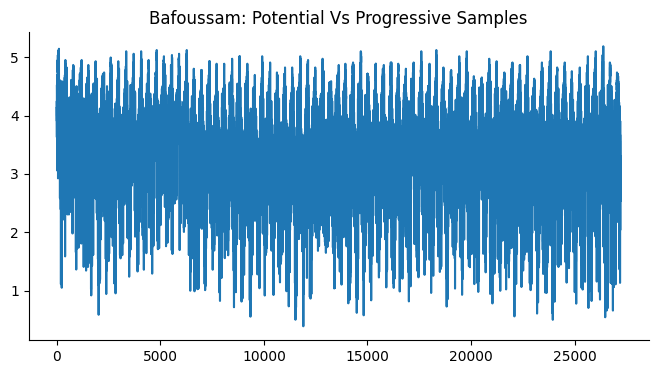

In [44]:
boufassam['potential'].plot(kind='line', figsize=(8, 4), title='Bafoussam: Potential Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

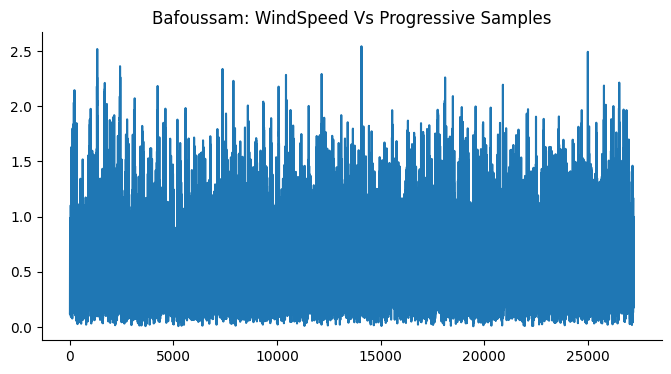

In [45]:
boufassam['wind_speed'].plot(kind='line', figsize=(8, 4), title='Bafoussam: WindSpeed Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

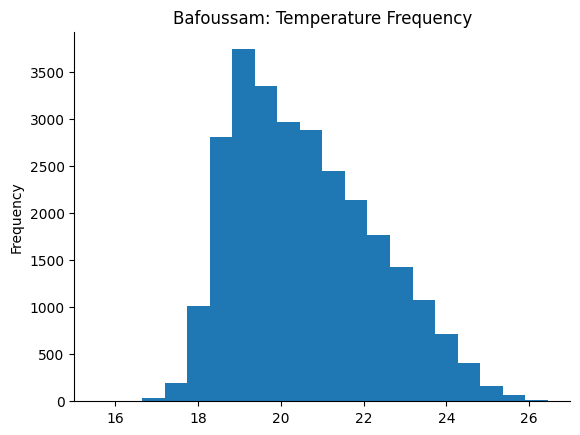

In [46]:
boufassam['temperature'].plot(kind='hist', bins=20, title='Bafoussam: Temperature Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

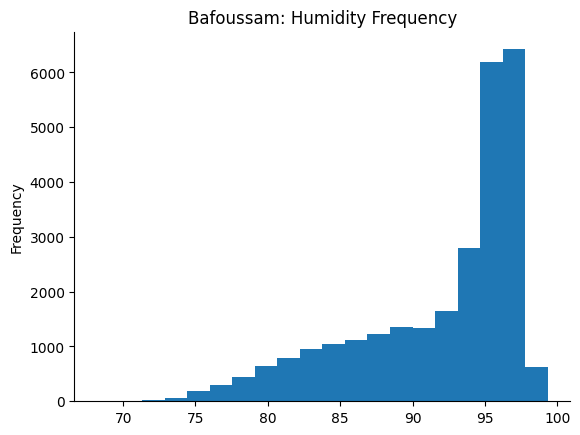

In [47]:
boufassam['humidity'].plot(kind='hist', bins=20, title='Bafoussam: Humidity Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

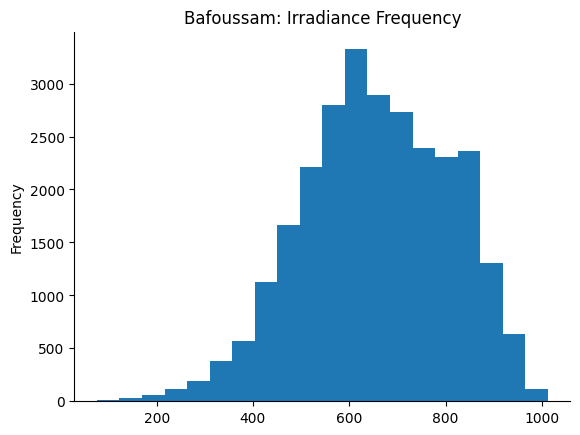

In [48]:
boufassam['irradiance'].plot(kind='hist', bins=20, title='Bafoussam: Irradiance Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

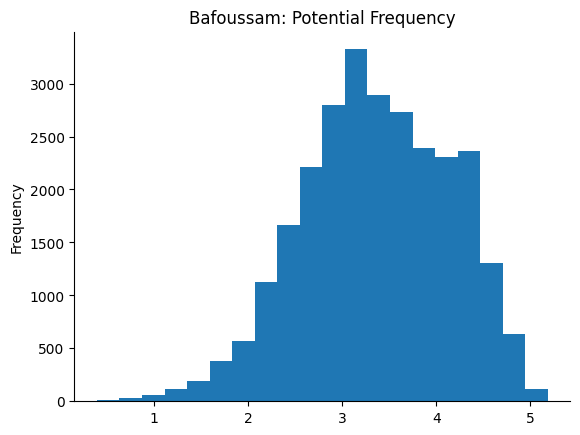

In [49]:
boufassam['potential'].plot(kind='hist', bins=20, title='Bafoussam: Potential Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

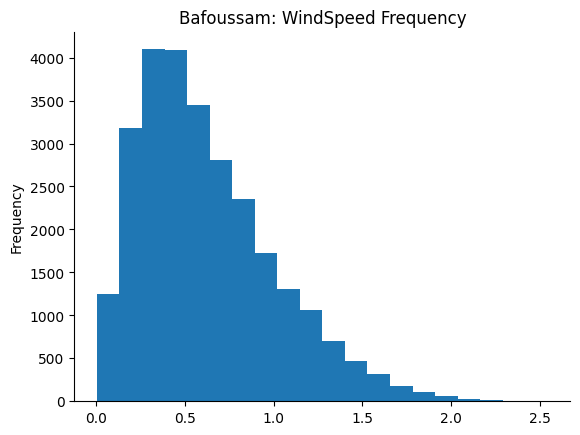

In [50]:
boufassam['wind_speed'].plot(kind='hist', bins=20, title='Bafoussam: WindSpeed Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

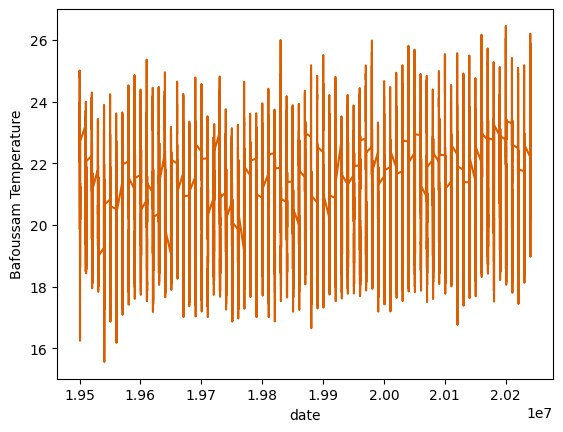

In [51]:
_plot_series(boufassam.sort_values('date', ascending=True), '', 'temperature', 1)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bafoussam Temperature')

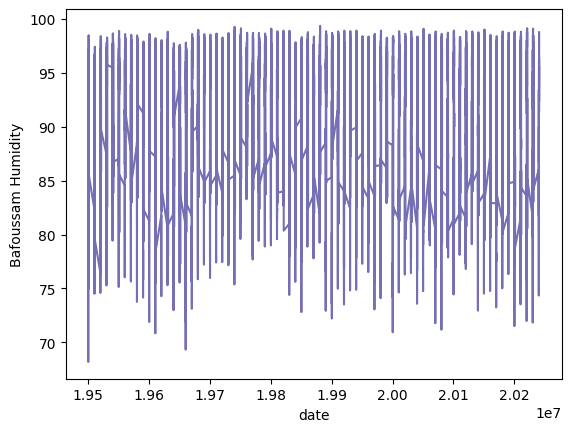

In [52]:
_plot_series(boufassam.sort_values('date', ascending=True), '', 'humidity', 2)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bafoussam Humidity')

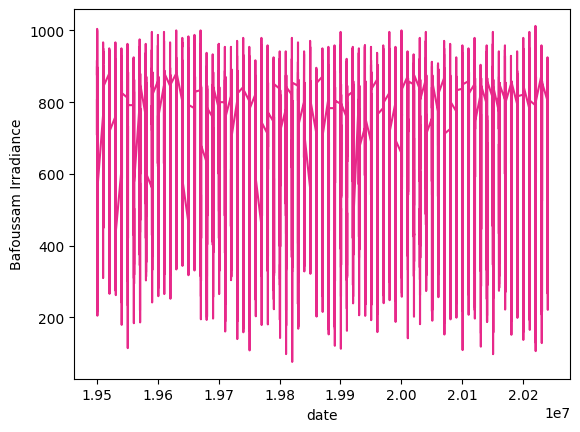

In [53]:
_plot_series(boufassam.sort_values('date', ascending=True), '', 'irradiance', 3)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bafoussam Irradiance')

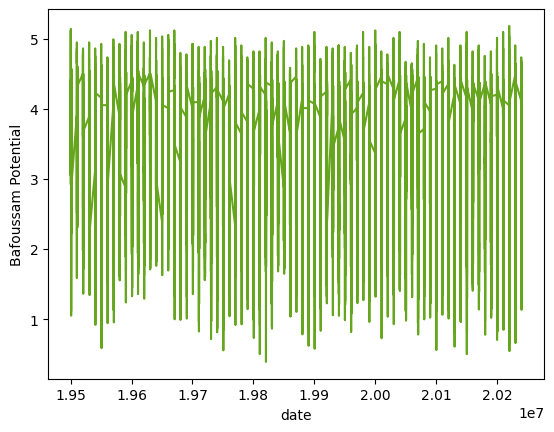

In [54]:
_plot_series(boufassam.sort_values('date', ascending=True), '', 'potential', 4)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bafoussam Potential')

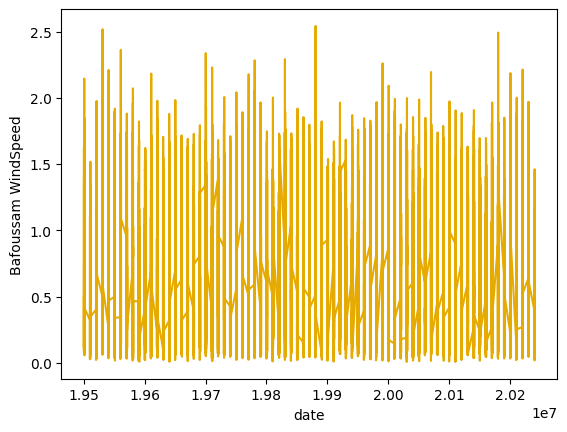

In [55]:
_plot_series(boufassam.sort_values('date', ascending=True), '', 'wind_speed', 5)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Bafoussam WindSpeed')

In [56]:
yaounde = clean_by_date_mean(yaounde, 'Yaounde')
yaounde.head()

date  irradiance  temperature  humidity  wind_speed  potential location
0  19500101      650.83       24.545    89.632      1.5157     3.3640  Yaounde
1  19500102      670.83       24.945    86.632      1.8157     3.4364  Yaounde
2  19500103      641.67       24.234    91.133      2.0908     3.2870  Yaounde
3  19500104      687.50       25.402    87.938      1.8240     3.5217  Yaounde
4  19500105      679.17       25.242    89.361      2.2644     3.4791  Yaounde

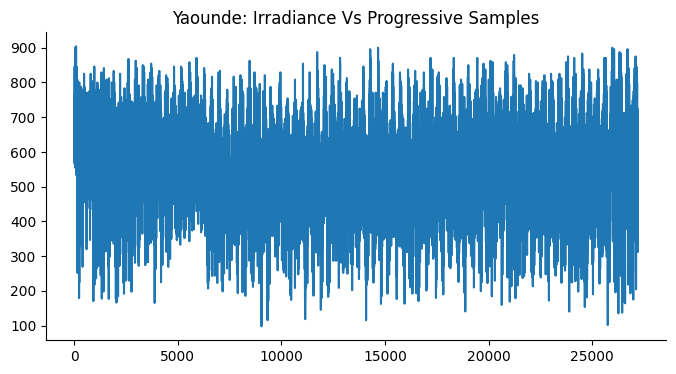

In [57]:
yaounde['irradiance'].plot(kind='line', figsize=(8, 4), title='Yaounde: Irradiance Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

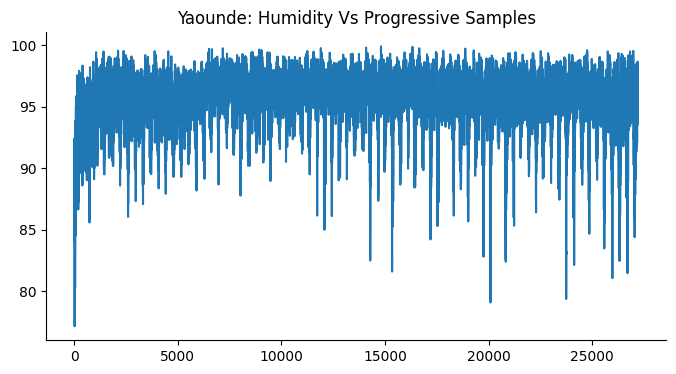

In [58]:
yaounde['humidity'].plot(kind='line', figsize=(8, 4), title='Yaounde: Humidity Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

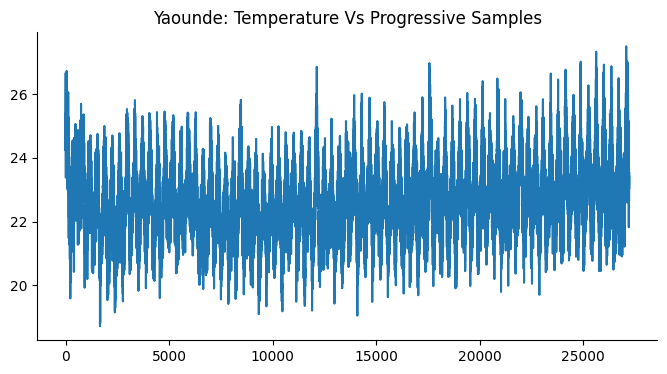

In [59]:
yaounde['temperature'].plot(kind='line', figsize=(8, 4), title='Yaounde: Temperature Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

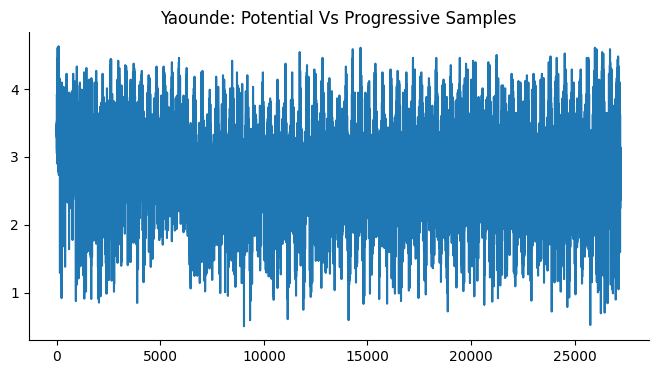

In [60]:
yaounde['potential'].plot(kind='line', figsize=(8, 4), title='Yaounde: Potential Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

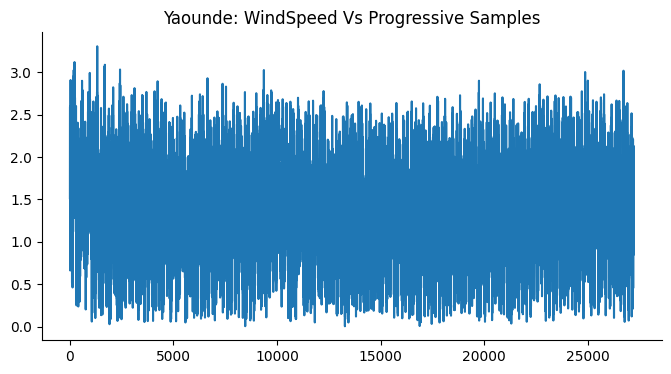

In [61]:
yaounde['wind_speed'].plot(kind='line', figsize=(8, 4), title='Yaounde: WindSpeed Vs Progressive Samples')
plt.gca().spines[['top', 'right']].set_visible(False)

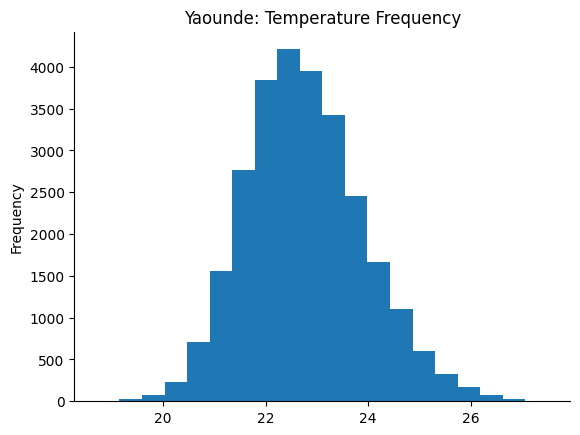

In [62]:
yaounde['temperature'].plot(kind='hist', bins=20, title='Yaounde: Temperature Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

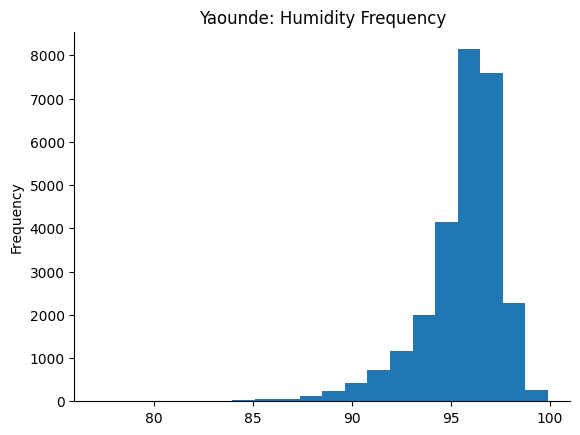

In [63]:
yaounde['humidity'].plot(kind='hist', bins=20, title='Yaounde: Humidity Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

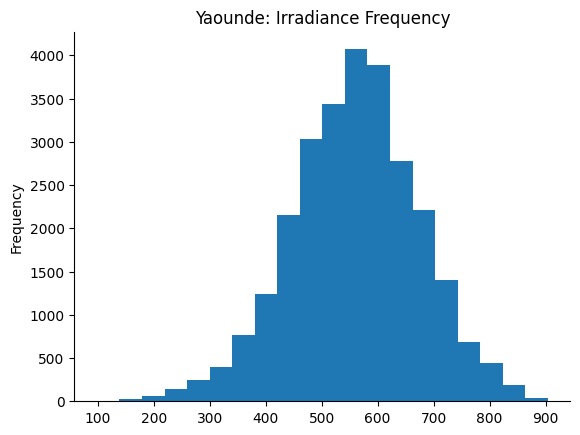

In [64]:
yaounde['irradiance'].plot(kind='hist', bins=20, title='Yaounde: Irradiance Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

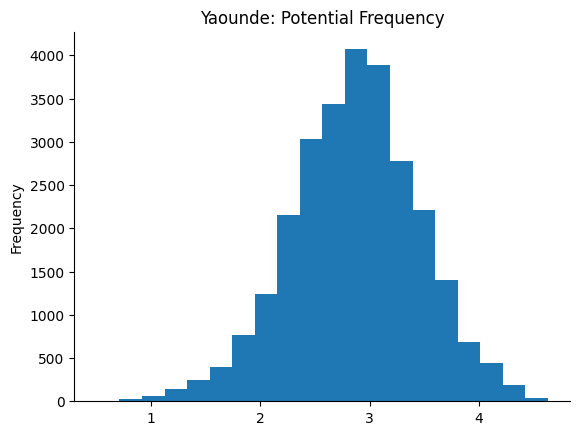

In [65]:
yaounde['potential'].plot(kind='hist', bins=20, title='Yaounde: Potential Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

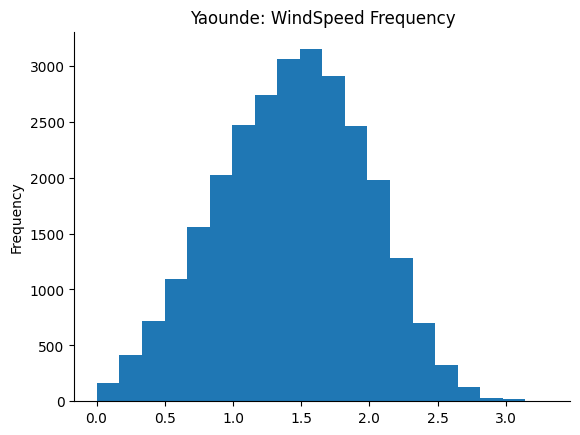

In [66]:
yaounde['wind_speed'].plot(kind='hist', bins=20, title='Yaounde: WindSpeed Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

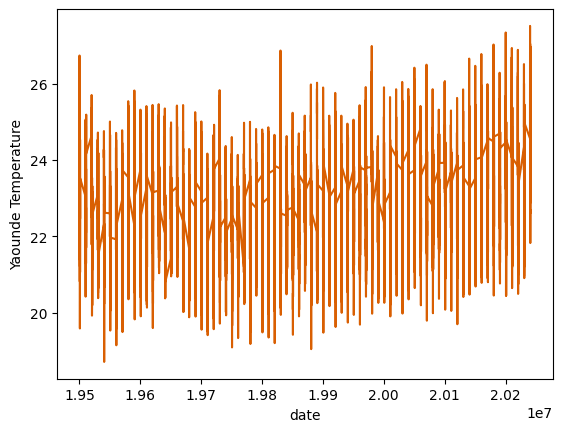

In [67]:
_plot_series(yaounde.sort_values('date', ascending=True), '', 'temperature', 1)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Yaounde Temperature')

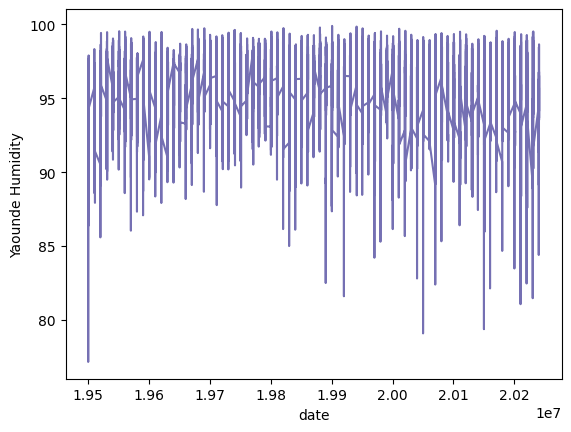

In [68]:
_plot_series(yaounde.sort_values('date', ascending=True), '', 'humidity', 2)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Yaounde Humidity')

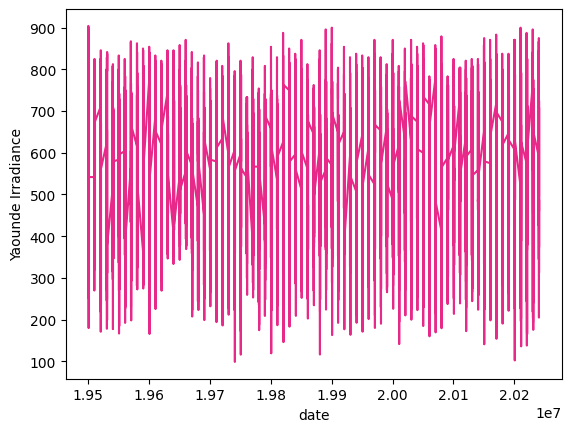

In [69]:
_plot_series(yaounde.sort_values('date', ascending=True), '', 'irradiance', 3)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Yaounde Irradiance')

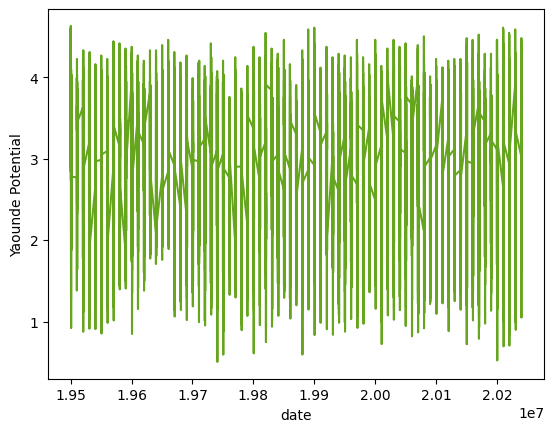

In [70]:
_plot_series(yaounde.sort_values('date', ascending=True), '', 'potential', 4)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Yaounde Potential')

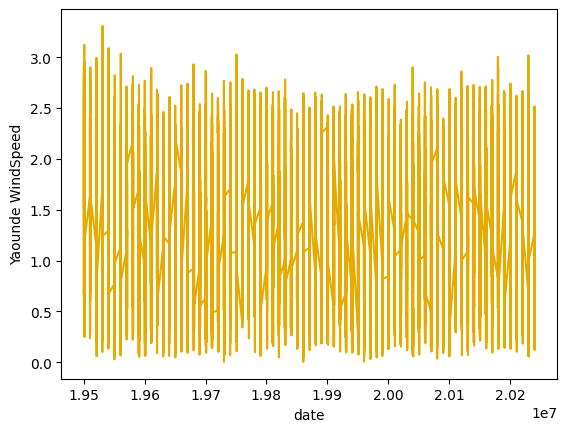

In [71]:
_plot_series(yaounde.sort_values('date', ascending=True), '', 'wind_speed', 5)
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Yaounde WindSpeed')

In [72]:
# Combine all towns
all_data = pd.concat([bamenda, bambili, boufassam, yaounde])
#all_data['date'] = pd.to_datetime(all_data['date'])  # Ensure for plotting

# Save to file
all_data.to_csv("Cleaned_Daily_Irradiance.csv", index=False)

In [73]:
pip install statsmodels pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.8 MB/s eta 0:00:00


In [74]:
# Ensure date is datetime and sort
all_data['date'] = pd.to_datetime(all_data['date'].astype(str), format='%Y%m%d')
all_data = all_data.sort_values(by=['location', 'date'])
all_data.head()

date  irradiance  temperature  humidity  wind_speed  potential  \
0 1950-01-01      637.50       20.300    73.536     0.23750     4.3901   
1 1950-01-02      837.50       20.352    73.225     0.26750     4.2901   
2 1950-01-03      791.67       20.654    75.678     0.47449     4.0553   
3 1950-01-04      850.00       21.388    73.610     0.44123     4.3541   
4 1950-01-05      841.67       21.435    74.990     0.35958     4.3115   

  location  
0  Bambili  
1  Bambili  
2  Bambili  
3  Bambili  
4  Bambili

In [75]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
    }

def run_models_per_location(data, forecast_days=30):
    locations = data['location'].unique()
    results = {}

    for loc in locations:
        print(f"\n🔍 Processing: {loc}")
        df = data[data['location'] == loc].copy()
        df = df.set_index('date')

        # Univariate ARIMA
        y = df['irradiance']
        train = y[:-forecast_days]
        test = y[-forecast_days:]

        print("→ Fitting ARIMA...")
        arima_model = ARIMA(train, order=(2,1,2)).fit()
        arima_forecast = arima_model.forecast(steps=forecast_days)

        arima_eval = evaluate_model(test, arima_forecast)
        print(f"ARIMA {arima_eval}")

        # Multivariate SARIMAX
        exog_vars = ['temperature', 'humidity', 'wind_speed']
        exog_train = df[exog_vars].iloc[:-forecast_days]
        exog_test = df[exog_vars].iloc[-forecast_days:]

        print("→ Fitting SARIMAX...")
        sarimax_model = SARIMAX(train, exog=exog_train, order=(1,1,1), seasonal_order=(0,0,0,0)).fit(disp=False)
        sarimax_forecast = sarimax_model.forecast(steps=forecast_days, exog=exog_test)

        sarimax_eval = evaluate_model(test, sarimax_forecast)
        print(f"SARIMAX {sarimax_eval}")

        # Save results
        results[loc] = {
            'ARIMA': arima_eval,
            'SARIMAX': sarimax_eval,
            'true': test,
            'arima_pred': arima_forecast,
            'sarimax_pred': sarimax_forecast
        }

        # Plot
        plt.figure(figsize=(10, 4))
        plt.plot(test.index, test.values, label='True')
        plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
        plt.plot(test.index, sarimax_forecast, label='SARIMAX Forecast')
        plt.title(f"{loc} - Forecasting Irradiance ({forecast_days} days)")
        plt.xlabel("Date")
        plt.ylabel("Irradiance")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return results



🔍 Processing: Bambili
→ Fitting ARIMA...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA {'MAE': 126.58389498934258, 'RMSE': 163.0190019064687}
→ Fitting SARIMAX...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMAX {'MAE': 88.85668857010356, 'RMSE': 98.34883161137269}


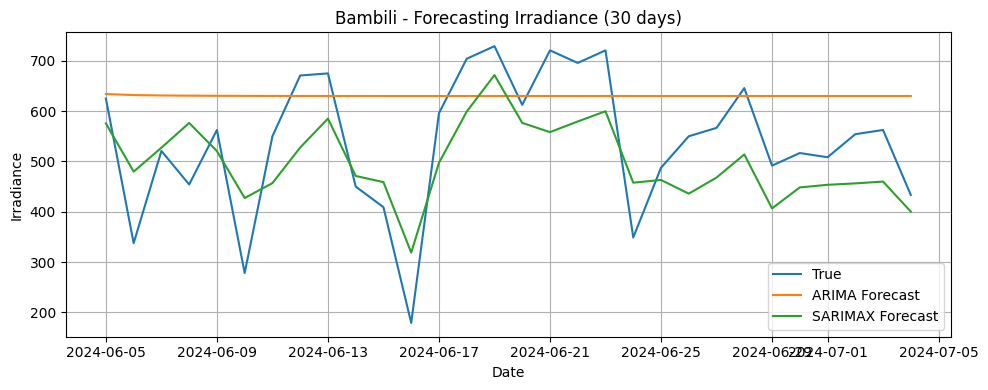


🔍 Processing: Bamenda
→ Fitting ARIMA...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA {'MAE': 124.61211585928521, 'RMSE': 158.6515891578175}
→ Fitting SARIMAX...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMAX {'MAE': 87.94638418685985, 'RMSE': 98.84088559966185}


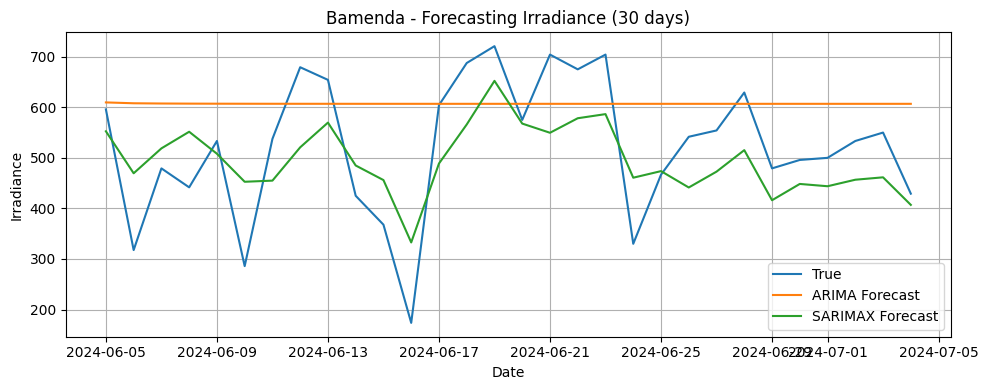


🔍 Processing: Boufassam
→ Fitting ARIMA...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA {'MAE': 104.85036631855266, 'RMSE': 148.41099824583966}
→ Fitting SARIMAX...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX {'MAE': 99.14316352735356, 'RMSE': 112.43600910233755}


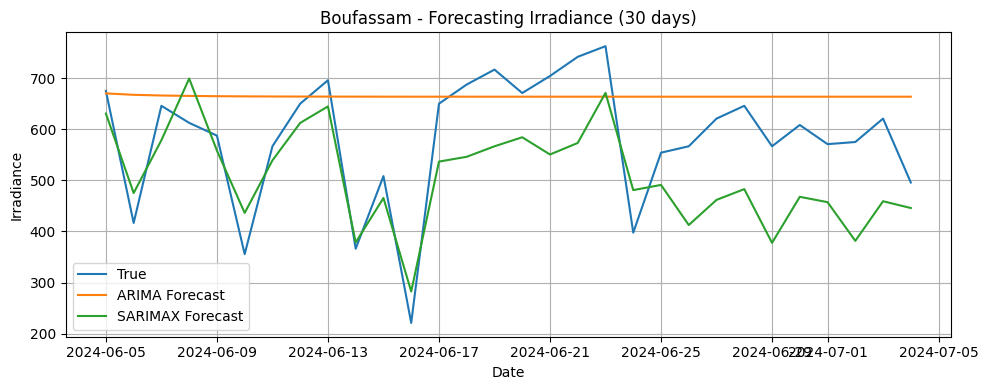


🔍 Processing: Yaounde
→ Fitting ARIMA...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA {'MAE': 77.72537825568743, 'RMSE': 102.1893809172728}
→ Fitting SARIMAX...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX {'MAE': 63.188722876979845, 'RMSE': 76.94788679686627}


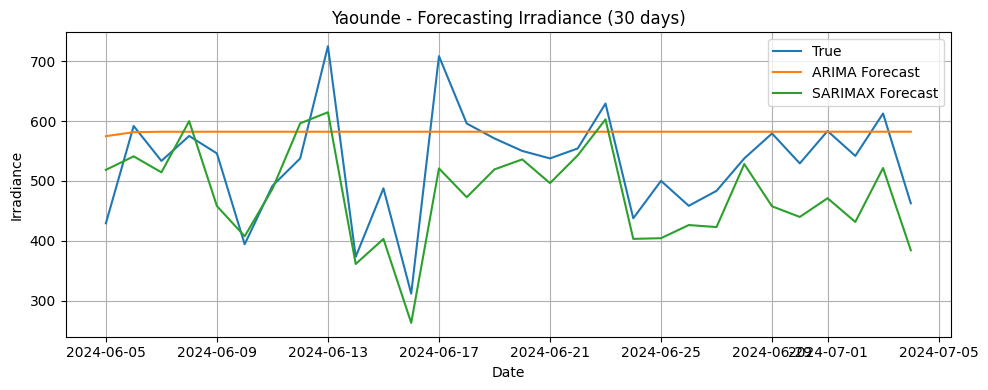

In [76]:
results = run_models_per_location(all_data, forecast_days=30)

In [77]:
!pip uninstall pmdarima -y
!pip install --no-cache-dir pmdarima
!pip install numpy==1.24.4

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.0 MB/s eta 0:00:00


In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

def run_advanced_forecasts(all_data, forecast_days=30, export_dir='forecasts/'):
    import os
    os.makedirs(export_dir, exist_ok=True)

    locations = all_data['location'].unique()
    results = {}

    for loc in locations:
        print(f"\n🔍 Location: {loc}")

        df = all_data[all_data['location'] == loc].copy()
        df = df.sort_values('date')
        df = df.set_index('date')

        y = df['irradiance']
        X = df[['temperature', 'humidity', 'wind_speed']]

        y_train, y_test = y[:-forecast_days], y[-forecast_days:]
        X_train, X_test = X.iloc[:-forecast_days], X.iloc[-forecast_days:]

        # 🧠 Auto ARIMA
        print("→ Auto ARIMA (non-seasonal)")
        arima_model = auto_arima(
            y_train,
            seasonal=False,
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore'
        )
        order = arima_model.order
        print(f"Best ARIMA order: {order}")

        arima_model = arima_model.fit(y_train)
        arima_pred = arima_model.predict(n_periods=forecast_days)

        arima_eval = evaluate_model(y_test, arima_pred)

        # 🔁 SARIMAX Grid Search (Seasonal SARIMA)
        print("→ SARIMAX with seasonal grid search")

        best_sarimax = None
        best_score = float('inf')
        best_params = None
        for seasonal_order in [(0,0,0,0), (1,0,1,12), (1,1,1,12), (2,1,1,12)]:
            try:
                model = SARIMAX(
                    y_train,
                    exog=X_train,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False
                ).fit(disp=False)
                pred = model.forecast(steps=forecast_days, exog=X_test)
                score = mean_squared_error(y_test, pred)
                if score < best_score:
                    best_score = score
                    best_sarimax = model
                    best_params = seasonal_order
            except:
                continue

        sarimax_pred = best_sarimax.forecast(steps=forecast_days, exog=X_test)
        sarimax_eval = evaluate_model(y_test, sarimax_pred)

        print(f"Best SARIMAX seasonal_order: {best_params}, RMSE: {sarimax_eval['RMSE']}")

        # 📤 Export to CSV
        forecast_df = pd.DataFrame({
            'date': y_test.index,
            'true_irradiance': y_test.values,
            'arima_pred': arima_pred,
            'sarimax_pred': sarimax_pred
        })
        forecast_df.to_csv(f"{export_dir}{loc.lower()}_forecast.csv", index=False)

        # 🖼 Plot
        plt.figure(figsize=(10, 5))
        plt.plot(y_test.index, y_test.values, label="True")
        plt.plot(y_test.index, arima_pred, label="ARIMA")
        plt.plot(y_test.index, sarimax_pred, label="SARIMAX")
        plt.title(f"{loc} Forecast (Next {forecast_days} Days)")
        plt.xlabel("Date")
        plt.ylabel("Irradiance")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # 🔍 Save results in dictionary
        results[loc] = {
            'ARIMA_eval': arima_eval,
            'SARIMAX_eval': sarimax_eval,
            'ARIMA_order': order,
            'SARIMAX_seasonal': best_params
        }

    return results


🔍 Location: Bambili
→ Auto ARIMA (non-seasonal)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order: (2, 1, 2)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


→ SARIMAX with seasonal grid search


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

Best SARIMAX seasonal_order: (1, 1, 1, 12), RMSE: 102.93758694347486


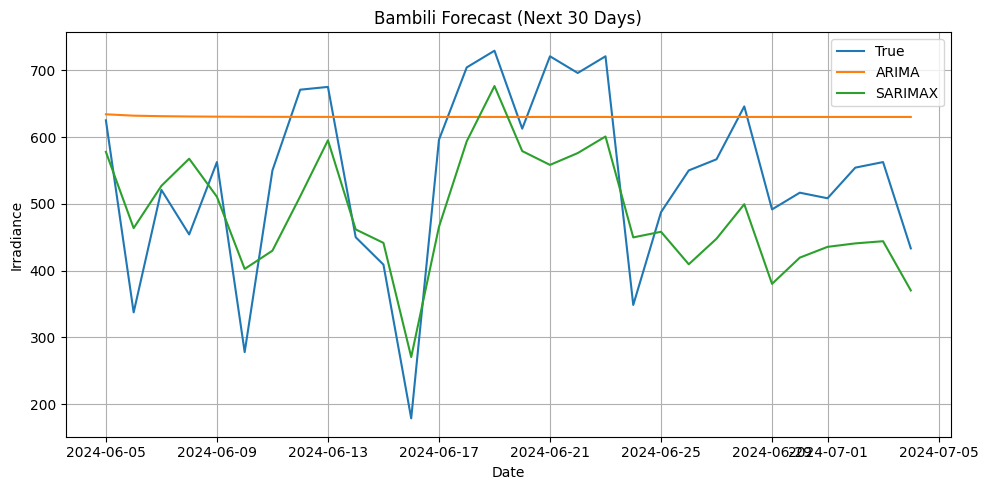


🔍 Location: Bamenda
→ Auto ARIMA (non-seasonal)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order: (2, 1, 2)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


→ SARIMAX with seasonal grid search


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

Best SARIMAX seasonal_order: (2, 1, 1, 12), RMSE: 99.61952312492123


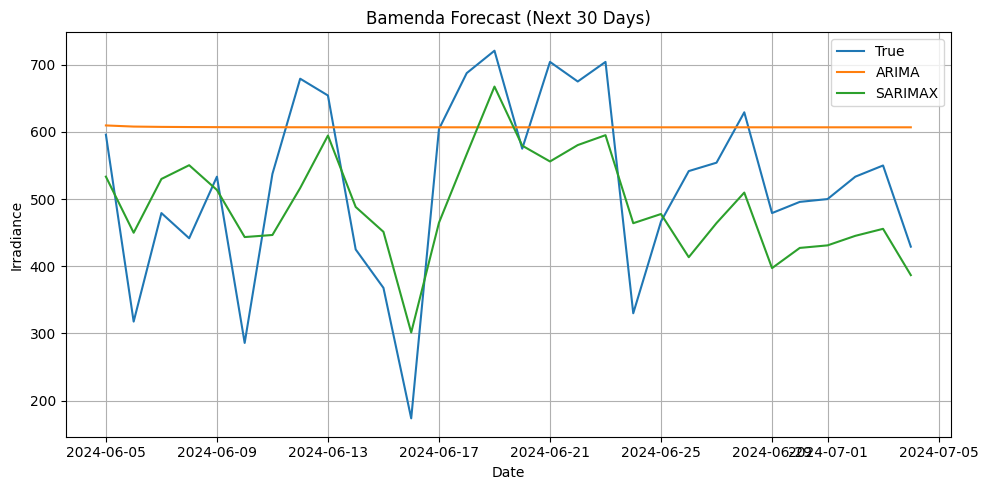


🔍 Location: Boufassam
→ Auto ARIMA (non-seasonal)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best ARIMA order: (2, 1, 2)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


→ SARIMAX with seasonal grid search


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Best SARIMAX seasonal_order: (0, 0, 0, 0), RMSE: 120.01279077067218


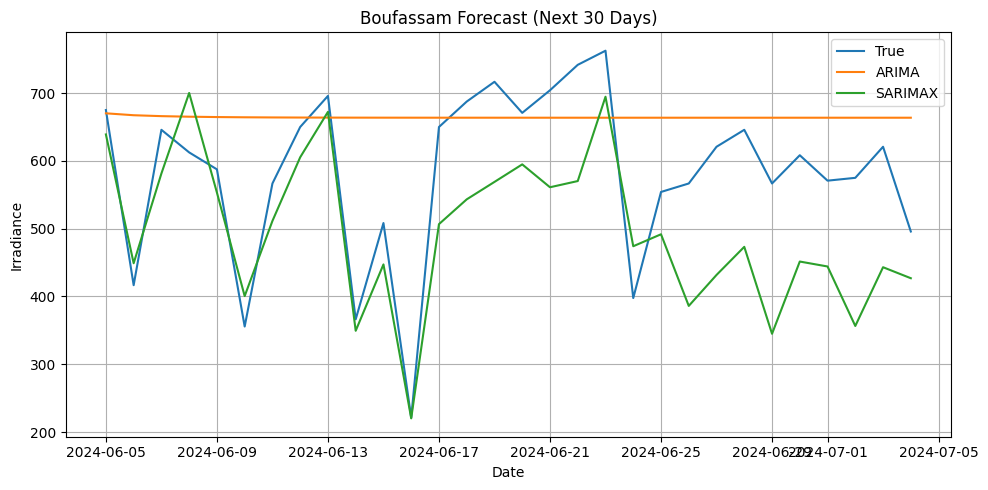


🔍 Location: Yaounde
→ Auto ARIMA (non-seasonal)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

KeyboardInterrupt: 

In [79]:
results_advanced = run_advanced_forecasts(all_data, forecast_days=30)

In [14]:
!pip install tensorflow

In [32]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

In [33]:
def prepare_lstm_data(df, feature_cols, target_col, sequence_length=30):
    X, y = [], []
    for i in range(len(df) - sequence_length):
        X.append(df[feature_cols].iloc[i:i+sequence_length].values)
        y.append(df[target_col].iloc[i+sequence_length])
    return np.array(X), np.array(y)

def build_lstm(input_shape):
    model = Sequential([
        LSTM(32, return_sequences=True, input_shape=input_shape),
        LSTM(16),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru(input_shape):
    model = Sequential([
        GRU(32, return_sequences=True, input_shape=input_shape),
        GRU(16),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [18]:
def run_lstm_gru_forecasts(all_data, sequence_length=30, forecast_days=30, epochs=20, batch_size=16):
    results = {}
    locations = all_data['location'].unique()

    for loc in locations:
        print(f"\n📡 Location: {loc}")
        df = all_data[all_data['location'] == loc].copy().sort_values('date')

        # Select features and scale
        features = ['irradiance', 'temperature', 'humidity', 'wind_speed']
        scaler = MinMaxScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
        df_scaled['date'] = df['date'].values  # keep original date

        # Split into train/test
        train_len = len(df_scaled) - forecast_days
        df_train = df_scaled.iloc[:train_len]
        df_test = df_scaled.iloc[train_len-sequence_length:]

        X_train, y_train = prepare_lstm_data(df_train, features, 'irradiance', sequence_length)
        X_test, y_test = prepare_lstm_data(df_test, features, 'irradiance', sequence_length)

        # --- LSTM ---
        lstm = build_lstm(input_shape=(sequence_length, len(features)))
        lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        lstm_pred_scaled = lstm.predict(X_test)
        lstm_pred = scaler.inverse_transform(np.hstack([
            lstm_pred_scaled,  # predicted irradiance
            np.zeros((len(lstm_pred_scaled), len(features)-1))  # padding for inverse_transform
        ]))[:, 0]

        # --- GRU ---
        gru = build_gru(input_shape=(sequence_length, len(features)))
        gru.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        gru_pred_scaled = gru.predict(X_test)
        gru_pred = scaler.inverse_transform(np.hstack([
            gru_pred_scaled,
            np.zeros((len(gru_pred_scaled), len(features)-1))
        ]))[:, 0]

        # True irradiance (in original scale)
        y_true = all_data[all_data['location'] == loc]['irradiance'].values[-forecast_days:]

        # Eval
        lstm_eval = {
            'RMSE': np.sqrt(mean_squared_error(y_true, lstm_pred)),
            'MAE': mean_absolute_error(y_true, lstm_pred)
        }
        gru_eval = {
            'RMSE': np.sqrt(mean_squared_error(y_true, gru_pred)),
            'MAE': mean_absolute_error(y_true, gru_pred)
        }

        print("LSTM", lstm_eval)
        print("GRU ", gru_eval)

        # Save + Plot
        dates = df['date'].iloc[-forecast_days:].values
        result_df = pd.DataFrame({
            'date': dates,
            'true_irradiance': y_true,
            'lstm_pred': lstm_pred,
            'gru_pred': gru_pred
        })
        result_df.to_csv(f"{loc.lower()}_lstm_gru_forecast.csv", index=False)

        plt.figure(figsize=(10, 5))
        plt.plot(dates, y_true, label='True')
        plt.plot(dates, lstm_pred, label='LSTM')
        plt.plot(dates, gru_pred, label='GRU')
        plt.title(f"{loc} Irradiance Forecast (LSTM vs GRU)")
        plt.xlabel("Date")
        plt.ylabel("Irradiance")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        results[loc] = {
            'LSTM_eval': lstm_eval,
            'GRU_eval': gru_eval
        }

    return results

In [ ]:
lstm_gru_results = run_lstm_gru_forecasts(all_data, sequence_length=30, forecast_days=30, epochs=20)


📡 Location: Bambili


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


def run_lstm_gru_forecasts(all_data, sequence_length=15, forecast_days=30, epochs=10, batch_size=16):
    import gc
    results = {}
    locations = all_data['location'].unique()

    for loc in locations:
        print(f"\n📡 Location: {loc}")
        df = all_data[all_data['location'] == loc].copy().sort_values('date').tail(1000)  # LIMIT TO RECENT 1000 days

        features = ['irradiance', 'temperature', 'humidity', 'wind_speed']
        scaler = MinMaxScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
        df_scaled['date'] = df['date'].values

        train_len = len(df_scaled) - forecast_days
        df_train = df_scaled.iloc[:train_len]
        df_test = df_scaled.iloc[train_len-sequence_length:]

        X_train, y_train = prepare_lstm_data(df_train, features, 'irradiance', sequence_length)
        X_test, y_test = prepare_lstm_data(df_test, features, 'irradiance', sequence_length)

        lstm = build_lstm((sequence_length, len(features)))
        lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        lstm_pred_scaled = lstm.predict(X_test)
        lstm_pred = scaler.inverse_transform(np.hstack([
            lstm_pred_scaled,
            np.zeros((len(lstm_pred_scaled), len(features)-1))
        ]))[:, 0]

        gru = build_gru((sequence_length, len(features)))
        gru.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        gru_pred_scaled = gru.predict(X_test)
        gru_pred = scaler.inverse_transform(np.hstack([
            gru_pred_scaled,
            np.zeros((len(gru_pred_scaled), len(features)-1))
        ]))[:, 0]

        y_true = df['irradiance'].values[-forecast_days:]

        lstm_eval = {
            'RMSE': np.sqrt(mean_squared_error(y_true, lstm_pred)),
            'MAE': mean_absolute_error(y_true, lstm_pred)
        }
        gru_eval = {
            'RMSE': np.sqrt(mean_squared_error(y_true, gru_pred)),
            'MAE': mean_absolute_error(y_true, gru_pred)
        }

        print("LSTM", lstm_eval)
        print("GRU ", gru_eval)

        result_df = pd.DataFrame({
            'date': df['date'].iloc[-forecast_days:].values,
            'true_irradiance': y_true,
            'lstm_pred': lstm_pred,
            'gru_pred': gru_pred
        })
        result_df.to_csv(f"{loc.lower()}_lstm_gru_forecast.csv", index=False)

        plt.figure(figsize=(10, 5))
        plt.plot(result_df['date'], result_df['true_irradiance'], label='True')
        plt.plot(result_df['date'], result_df['lstm_pred'], label='LSTM')
        plt.plot(result_df['date'], result_df['gru_pred'], label='GRU')
        plt.title(f"{loc} Irradiance Forecast (LSTM vs GRU)")
        plt.xlabel("Date")
        plt.ylabel("Irradiance")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f"{loc.lower()}_lstm_gru_plot.png")
        #plt.close()

        results[loc] = {
            'LSTM_eval': lstm_eval,
            'GRU_eval': gru_eval
        }

        # Free memory
        del lstm, gru, X_train, X_test, y_train, y_test
        gc.collect()

    return results



📡 Location: Bambili


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
LSTM {'RMSE': np.float64(142.5889415997645), 'MAE': 114.96679995075858}
GRU  {'RMSE': np.float64(143.97070566423687), 'MAE': 108.68461667595308}


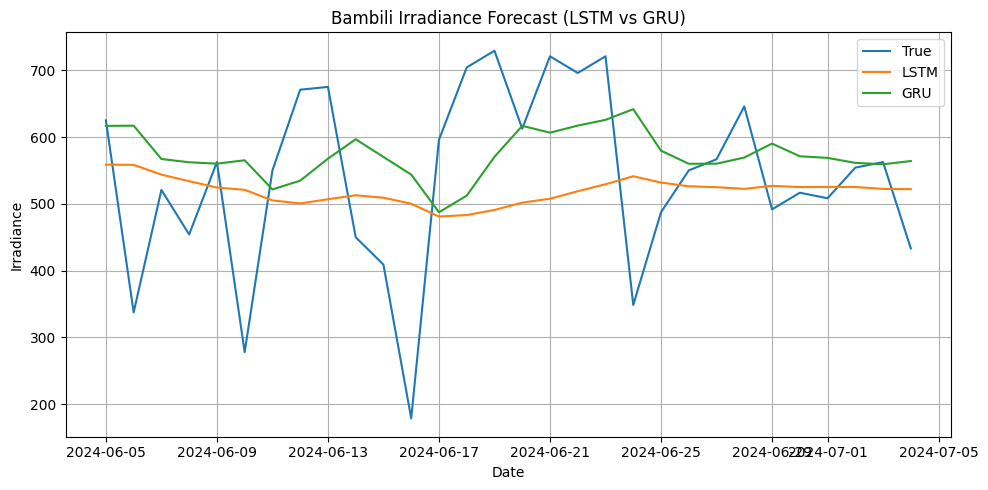


📡 Location: Bamenda


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
LSTM {'RMSE': np.float64(143.2632575312176), 'MAE': 113.64350320585571}
GRU  {'RMSE': np.float64(139.0300704724718), 'MAE': 111.89520876518887}


<Figure size 640x480 with 0 Axes>

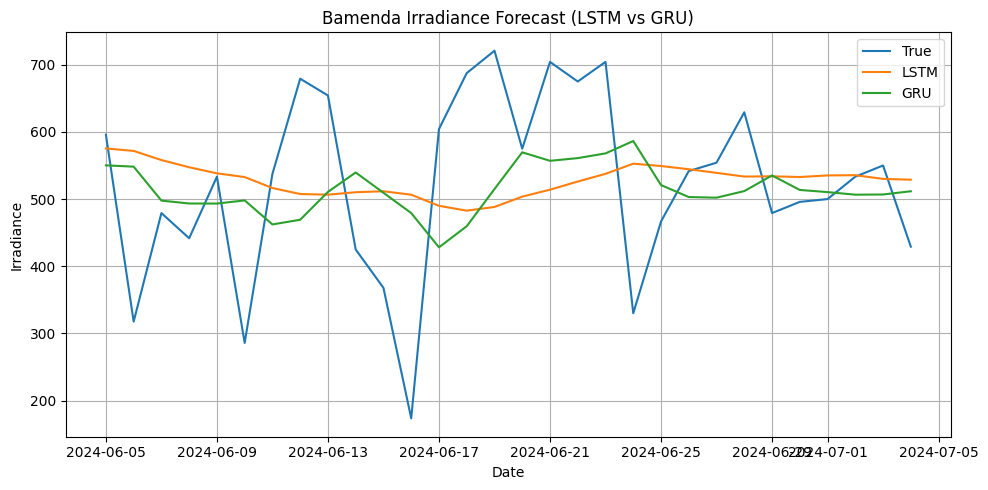


📡 Location: Boufassam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
LSTM {'RMSE': np.float64(131.2765710786919), 'MAE': 100.67978950826328}
GRU  {'RMSE': np.float64(129.0107270750115), 'MAE': 99.07504819532237}


<Figure size 640x480 with 0 Axes>

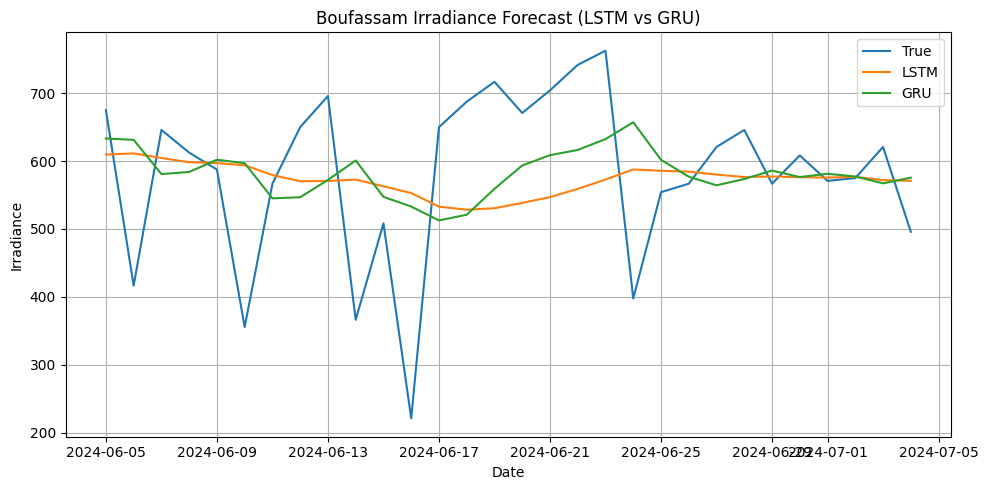


📡 Location: Yaounde


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
LSTM {'RMSE': np.float64(105.30111802617226), 'MAE': 80.61051877947645}
GRU  {'RMSE': np.float64(96.14543052063239), 'MAE': 70.743978783528}


<Figure size 640x480 with 0 Axes>

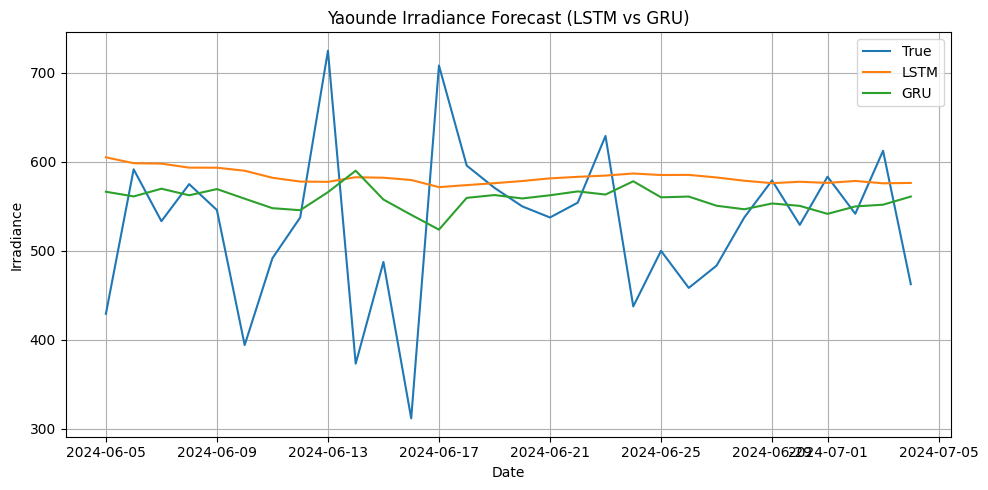

<Figure size 640x480 with 0 Axes>

In [35]:
lstm_gru_results = run_lstm_gru_forecasts(all_data)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_forecast(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}


In [37]:
!pip install prophet

In [42]:
from prophet import Prophet

def run_prophet(all_data, forecast_days=30):
    results = {}
    locations = all_data['location'].unique()

    for loc in locations:
        print(f"\n📈 Prophet Forecasting: {loc}")
        df = all_data[all_data['location'] == loc][['date', 'irradiance']].copy()
        df.columns = ['ds', 'y']  # Prophet requires these names

        train = df[:-forecast_days]
        test = df[-forecast_days:]

        model = Prophet(daily_seasonality=True, yearly_seasonality=True)
        model.fit(train)

        future = model.make_future_dataframe(periods=forecast_days)
        forecast = model.predict(future)

        y_pred = forecast['yhat'].iloc[-forecast_days:].values
        y_true = test['y'].values
        test_dates = test['ds'].values

        metrics = evaluate_forecast(y_true, y_pred)
        print("Prophet:", metrics)

        pd.DataFrame({
            'date': test_dates,
            'true_irradiance': y_true,
            'prophet_pred': y_pred
        }).to_csv(f"{loc.lower()}_prophet_forecast.csv", index=False)

        results[loc] = metrics

             # Add this in the loop inside run_prophet()
        plt.figure(figsize=(10, 5))
        plt.plot(test_dates, y_true, label='True')
        plt.plot(test_dates, y_pred, label='Prophet Forecast')
        plt.title(f"{loc} - Prophet Forecast vs True Irradiance")
        plt.xlabel("Date")
        plt.ylabel("Irradiance")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f"{loc.lower()}_prophet_plot.png")
        #plt.close()


    return results


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout

def build_cnn_lstm(input_shape):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [44]:
def run_cnn_lstm(all_data, sequence_length=30, forecast_days=30, epochs=10):
    from sklearn.preprocessing import MinMaxScaler
    import gc
    results = {}

    for loc in all_data['location'].unique():
        print(f"\n🧠 CNN+LSTM Forecasting: {loc}")
        df = all_data[all_data['location'] == loc].copy().sort_values('date').tail(1000)
        features = ['irradiance', 'temperature', 'humidity', 'wind_speed']

        scaler = MinMaxScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
        df_scaled['date'] = df['date'].values

        train_len = len(df_scaled) - forecast_days
        df_train = df_scaled.iloc[:train_len]
        df_test = df_scaled.iloc[train_len-sequence_length:]

        X_train, y_train = prepare_lstm_data(df_train, features, 'irradiance', sequence_length)
        X_test, y_test = prepare_lstm_data(df_test, features, 'irradiance', sequence_length)

        model = build_cnn_lstm((sequence_length, len(features)))
        model.fit(X_train, y_train, epochs=epochs, batch_size=16, verbose=0)
        y_pred_scaled = model.predict(X_test)

        y_pred = scaler.inverse_transform(np.hstack([
            y_pred_scaled, np.zeros((len(y_pred_scaled), len(features)-1))
        ]))[:, 0]
        y_true = df['irradiance'].values[-forecast_days:]

        metrics = evaluate_forecast(y_true, y_pred)
        print("CNN+LSTM:", metrics)

        pd.DataFrame({
            'date': df['date'].iloc[-forecast_days:].values,
            'true_irradiance': y_true,
            'cnn_lstm_pred': y_pred
        }).to_csv(f"{loc.lower()}_cnn_lstm_forecast.csv", index=False)

        results[loc] = metrics

        # Add this inside the for-loop in run_cnn_lstm()
        plt.figure(figsize=(10, 5))
        plt.plot(df['date'].iloc[-forecast_days:], y_true, label='True')
        plt.plot(df['date'].iloc[-forecast_days:], y_pred, label='CNN+LSTM Forecast')
        plt.title(f"{loc} - CNN+LSTM Forecast vs True Irradiance")
        plt.xlabel("Date")
        plt.ylabel("Irradiance")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f"{loc.lower()}_cnn_lstm_plot.png")
        plt.close()


        del model, X_train, X_test, y_train, y_test
        gc.collect()

    return results


DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7dcq2js/hylc9e5w.json



📈 Prophet Forecasting: Bambili


DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7dcq2js/m40exgrl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95148', 'data', 'file=/tmp/tmpd7dcq2js/hylc9e5w.json', 'init=/tmp/tmpd7dcq2js/m40exgrl.json', 'output', 'file=/tmp/tmpd7dcq2js/prophet_model5m7xfvdd/prophet_model-20250627235435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:54:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet: {'MAE': 106.73131224427007, 'RMSE': np.float64(138.1348056475579), 'MAPE': np.float64(26.533769887097858)}


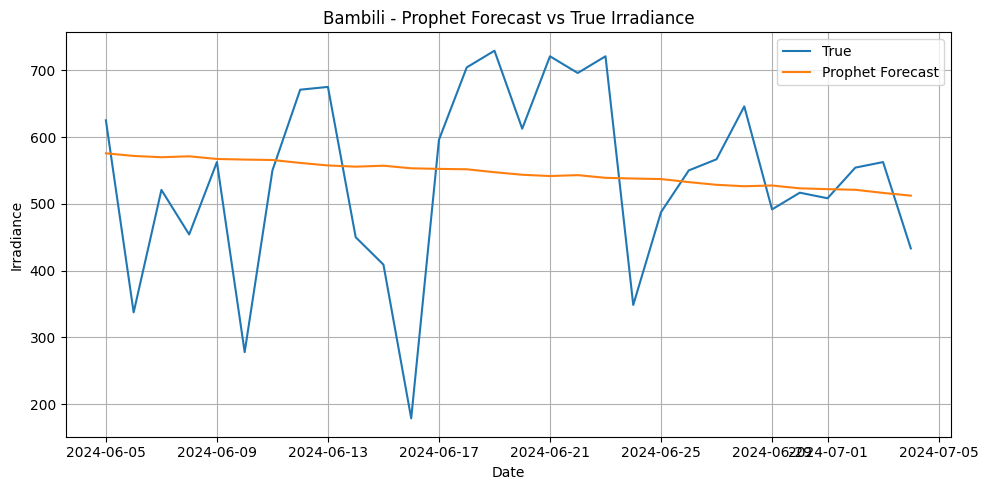

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7dcq2js/znf62259.json



📈 Prophet Forecasting: Bamenda


DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7dcq2js/eu7fkvq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81696', 'data', 'file=/tmp/tmpd7dcq2js/znf62259.json', 'init=/tmp/tmpd7dcq2js/eu7fkvq9.json', 'output', 'file=/tmp/tmpd7dcq2js/prophet_modelgxemspj9/prophet_model-20250627235453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:55:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet: {'MAE': 108.37145403047099, 'RMSE': np.float64(137.9912285186898), 'MAPE': np.float64(27.345898054730633)}


<Figure size 640x480 with 0 Axes>

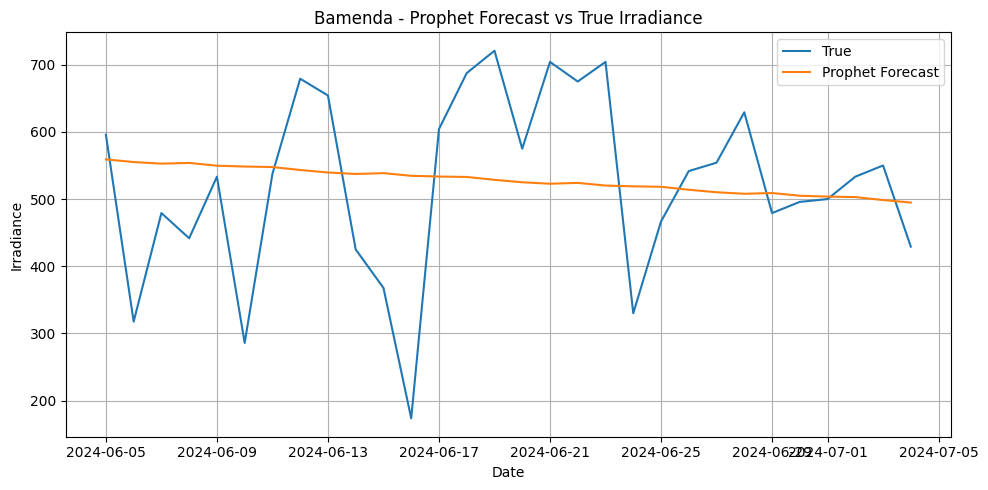

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7dcq2js/8qj02wts.json



📈 Prophet Forecasting: Boufassam


DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7dcq2js/0izf__fx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64836', 'data', 'file=/tmp/tmpd7dcq2js/8qj02wts.json', 'init=/tmp/tmpd7dcq2js/0izf__fx.json', 'output', 'file=/tmp/tmpd7dcq2js/prophet_modelvjgh9ikt/prophet_model-20250627235509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:55:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet: {'MAE': 94.27080497263654, 'RMSE': np.float64(125.70563581817319), 'MAPE': np.float64(20.983030936117306)}


<Figure size 640x480 with 0 Axes>

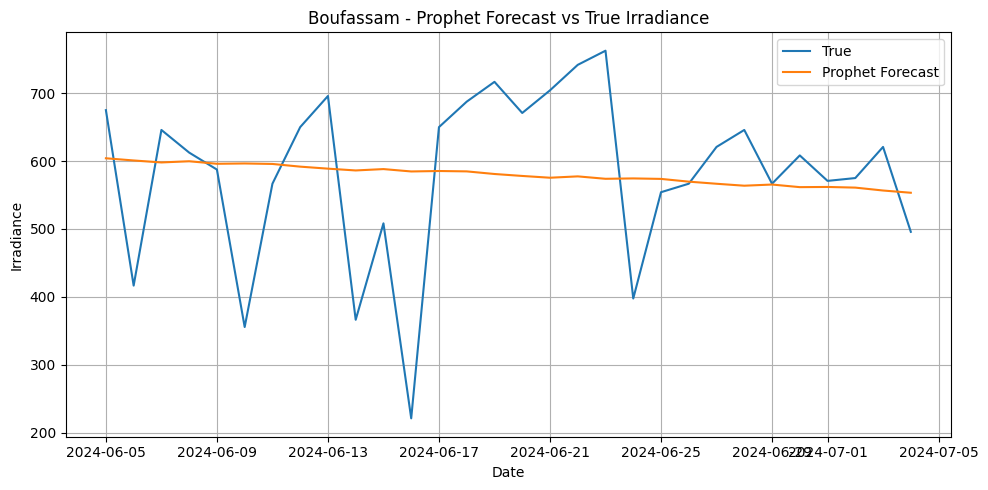


📈 Prophet Forecasting: Yaounde


DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7dcq2js/9l8zp6ky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7dcq2js/xp2cos6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50378', 'data', 'file=/tmp/tmpd7dcq2js/9l8zp6ky.json', 'init=/tmp/tmpd7dcq2js/xp2cos6n.json', 'output', 'file=/tmp/tmpd7dcq2js/prophet_model0q1cg63p/prophet_model-20250627235526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:55:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet: {'MAE': 67.25794583516843, 'RMSE': np.float64(88.76823647790548), 'MAPE': np.float64(13.83155237602723)}


<Figure size 640x480 with 0 Axes>

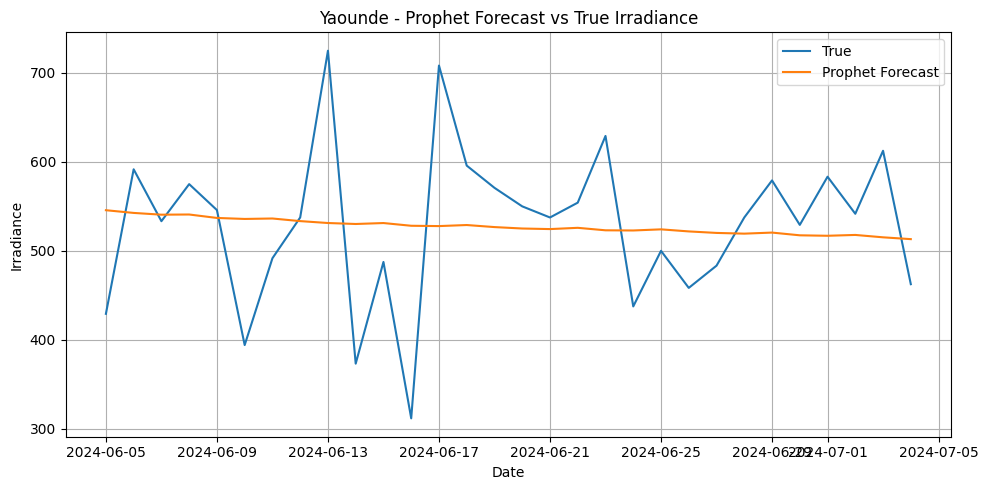


🧠 CNN+LSTM Forecasting: Bambili


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
CNN+LSTM: {'MAE': 117.11790881848336, 'RMSE': np.float64(145.95842802873017), 'MAPE': np.float64(27.86439021932891)}


<Figure size 640x480 with 0 Axes>

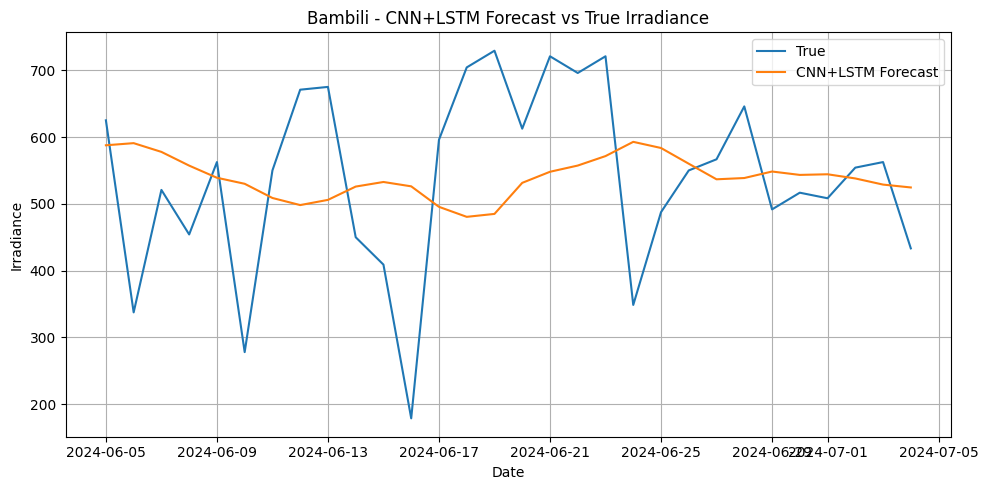


🧠 CNN+LSTM Forecasting: Bamenda


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
CNN+LSTM: {'MAE': 116.47012101809183, 'RMSE': np.float64(147.05220309993118), 'MAPE': np.float64(29.133825679075205)}


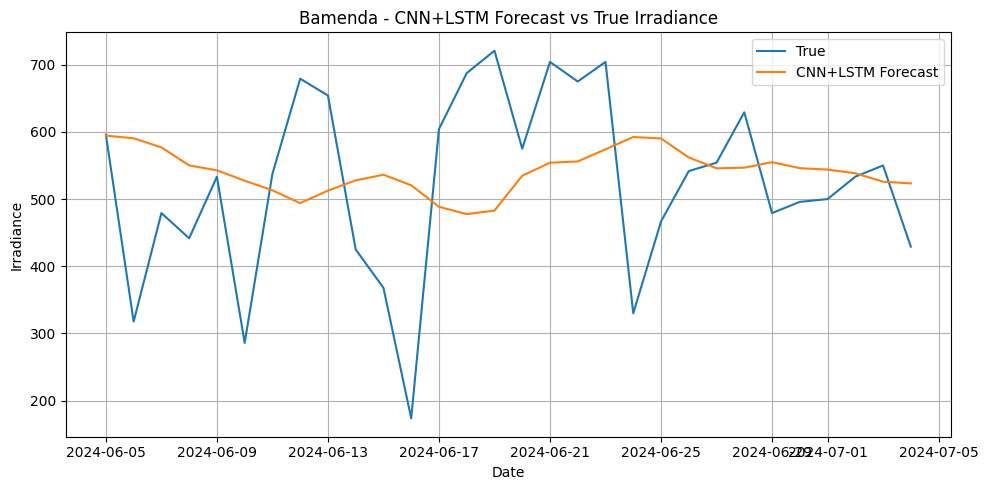


🧠 CNN+LSTM Forecasting: Boufassam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
CNN+LSTM: {'MAE': 100.51016325240333, 'RMSE': np.float64(131.6731107663375), 'MAPE': np.float64(21.939915477600266)}


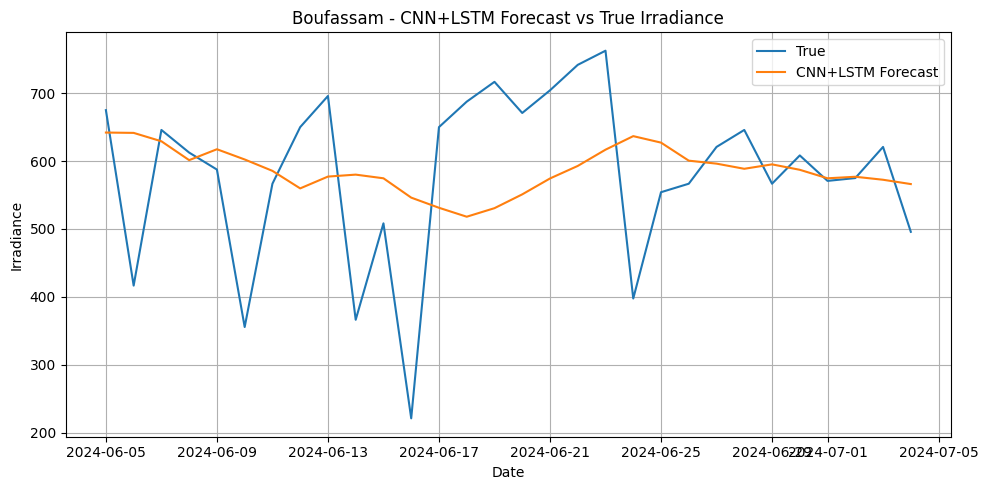


🧠 CNN+LSTM Forecasting: Yaounde


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
CNN+LSTM: {'MAE': 68.18175007092954, 'RMSE': np.float64(92.63360930294692), 'MAPE': np.float64(14.334399668391773)}


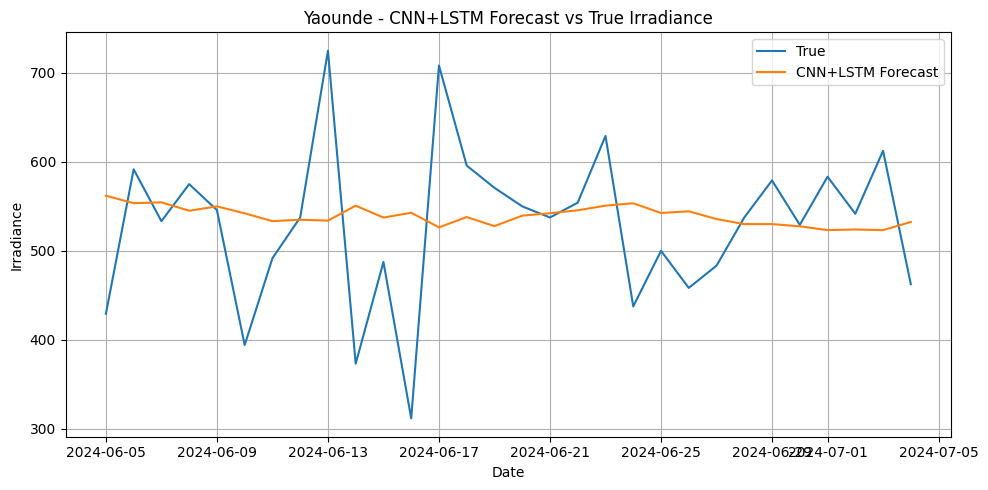

In [45]:
prophet_results = run_prophet(all_data, forecast_days=30)
cnn_lstm_results = run_cnn_lstm(all_data, forecast_days=30)

In [46]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [47]:
!pip install einops


📍 Location: Bambili
Epoch 1/15 Train Loss: 0.13552 Val Loss: 0.04719
Epoch 2/15 Train Loss: 0.06104 Val Loss: 0.03898
Epoch 3/15 Train Loss: 0.04939 Val Loss: 0.02284
Epoch 4/15 Train Loss: 0.04113 Val Loss: 0.01600
Epoch 5/15 Train Loss: 0.03547 Val Loss: 0.02600
Epoch 6/15 Train Loss: 0.03054 Val Loss: 0.01705
Epoch 7/15 Train Loss: 0.02690 Val Loss: 0.01424
Epoch 8/15 Train Loss: 0.02546 Val Loss: 0.01226
Epoch 9/15 Train Loss: 0.02283 Val Loss: 0.01064
Epoch 10/15 Train Loss: 0.02082 Val Loss: 0.01139
Epoch 11/15 Train Loss: 0.02023 Val Loss: 0.01167
Epoch 12/15 Train Loss: 0.02057 Val Loss: 0.01363
Epoch 13/15 Train Loss: 0.01863 Val Loss: 0.01631
Epoch 14/15 Train Loss: 0.01904 Val Loss: 0.01945
Epoch 15/15 Train Loss: 0.01844 Val Loss: 0.00712
Metrics: {'RMSE': np.float64(74.2487077696895), 'MAE': 55.61568832397461, 'MAPE': np.float32(13.087015)}


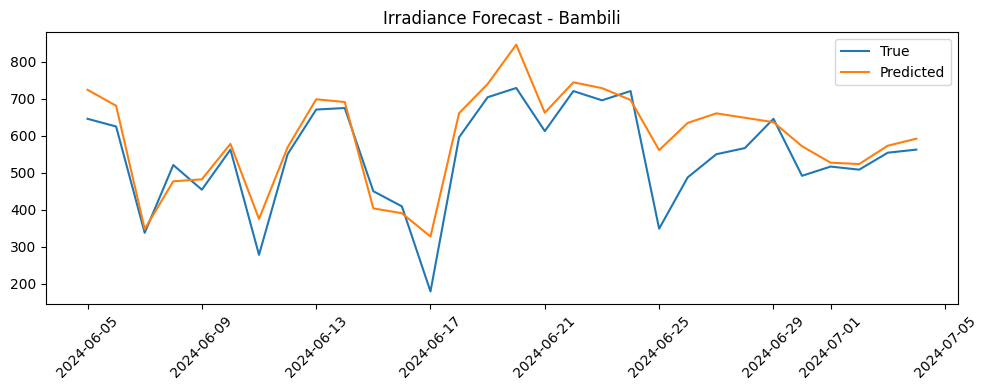


📍 Location: Bamenda
Epoch 1/15 Train Loss: 0.38261 Val Loss: 0.11939
Epoch 2/15 Train Loss: 0.13942 Val Loss: 0.06530
Epoch 3/15 Train Loss: 0.07876 Val Loss: 0.12832
Epoch 4/15 Train Loss: 0.06909 Val Loss: 0.10918
Epoch 5/15 Train Loss: 0.06341 Val Loss: 0.06083
Epoch 6/15 Train Loss: 0.05504 Val Loss: 0.08899
Epoch 7/15 Train Loss: 0.05148 Val Loss: 0.03717
Epoch 8/15 Train Loss: 0.04549 Val Loss: 0.05247
Epoch 9/15 Train Loss: 0.03840 Val Loss: 0.03452
Epoch 10/15 Train Loss: 0.03596 Val Loss: 0.02606
Epoch 11/15 Train Loss: 0.03117 Val Loss: 0.01781
Epoch 12/15 Train Loss: 0.02757 Val Loss: 0.01593
Epoch 13/15 Train Loss: 0.02550 Val Loss: 0.01347
Epoch 14/15 Train Loss: 0.02370 Val Loss: 0.01914
Epoch 15/15 Train Loss: 0.02236 Val Loss: 0.02027
Metrics: {'RMSE': np.float64(128.1449450939248), 'MAE': 99.43675994873047, 'MAPE': np.float32(23.921762)}


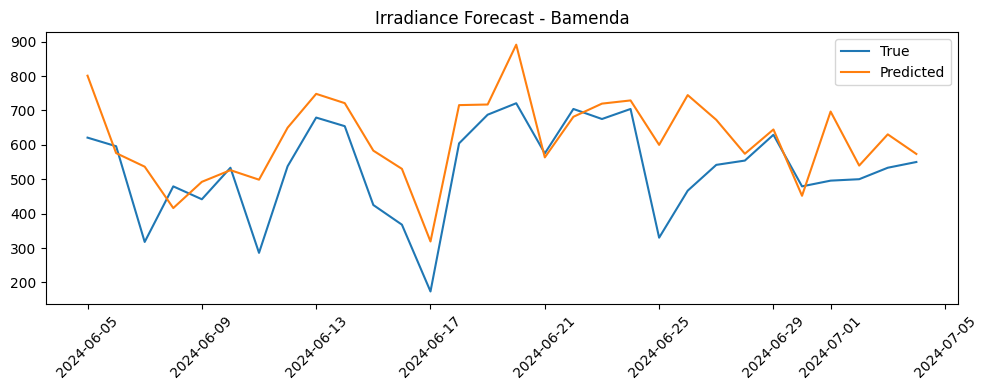


📍 Location: Boufassam
Epoch 1/15 Train Loss: 0.16563 Val Loss: 0.11125
Epoch 2/15 Train Loss: 0.07522 Val Loss: 0.06672
Epoch 3/15 Train Loss: 0.05380 Val Loss: 0.03529
Epoch 4/15 Train Loss: 0.04458 Val Loss: 0.05389
Epoch 5/15 Train Loss: 0.03959 Val Loss: 0.03939
Epoch 6/15 Train Loss: 0.03458 Val Loss: 0.03230
Epoch 7/15 Train Loss: 0.03110 Val Loss: 0.01944
Epoch 8/15 Train Loss: 0.02902 Val Loss: 0.02438
Epoch 9/15 Train Loss: 0.02551 Val Loss: 0.01599
Epoch 10/15 Train Loss: 0.02423 Val Loss: 0.02275
Epoch 11/15 Train Loss: 0.02210 Val Loss: 0.02020
Epoch 12/15 Train Loss: 0.02075 Val Loss: 0.01294
Epoch 13/15 Train Loss: 0.02013 Val Loss: 0.01005
Epoch 14/15 Train Loss: 0.01878 Val Loss: 0.01394
Epoch 15/15 Train Loss: 0.01863 Val Loss: 0.00896
Metrics: {'RMSE': np.float64(85.78114469483518), 'MAE': 66.89485931396484, 'MAPE': np.float32(13.482528)}


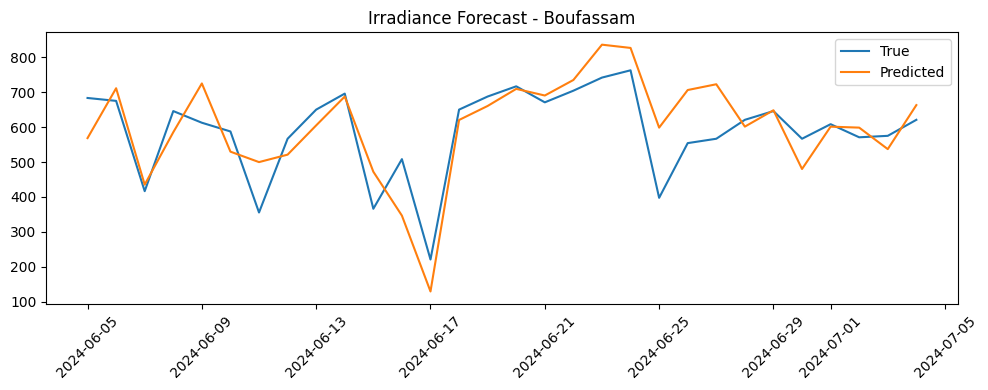


📍 Location: Yaounde
Epoch 1/15 Train Loss: 0.32750 Val Loss: 0.08197
Epoch 2/15 Train Loss: 0.10478 Val Loss: 0.10456
Epoch 3/15 Train Loss: 0.06926 Val Loss: 0.03207
Epoch 4/15 Train Loss: 0.04890 Val Loss: 0.01895
Epoch 5/15 Train Loss: 0.03538 Val Loss: 0.01965
Epoch 6/15 Train Loss: 0.02778 Val Loss: 0.01177
Epoch 7/15 Train Loss: 0.02227 Val Loss: 0.00781
Epoch 8/15 Train Loss: 0.01985 Val Loss: 0.00577
Epoch 9/15 Train Loss: 0.01681 Val Loss: 0.00430
Epoch 10/15 Train Loss: 0.01553 Val Loss: 0.00348
Epoch 11/15 Train Loss: 0.01485 Val Loss: 0.00306
Epoch 12/15 Train Loss: 0.01406 Val Loss: 0.00691
Epoch 13/15 Train Loss: 0.01297 Val Loss: 0.00673
Epoch 14/15 Train Loss: 0.01239 Val Loss: 0.00375
Epoch 15/15 Train Loss: 0.01201 Val Loss: 0.00475
Metrics: {'RMSE': np.float64(52.37507225159098), 'MAE': 37.187679290771484, 'MAPE': np.float32(7.8464537)}


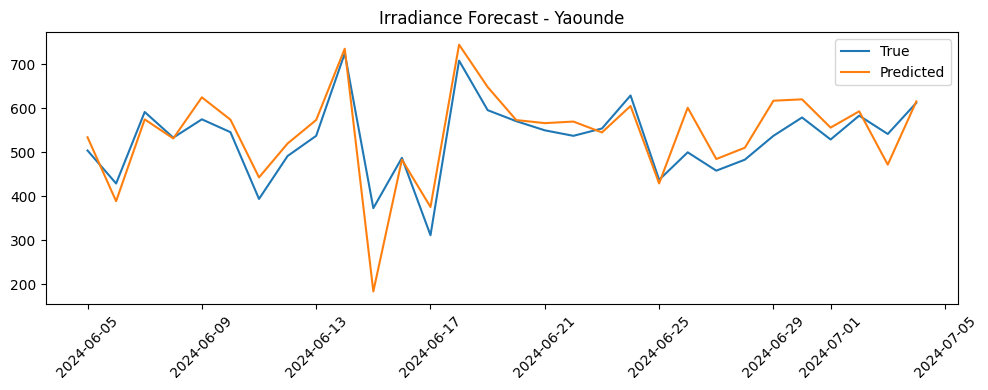


=== Summary Metrics per Location ===
Bambili: RMSE=74.249, MAE=55.616, MAPE=13.09%
Bamenda: RMSE=128.145, MAE=99.437, MAPE=23.92%
Boufassam: RMSE=85.781, MAE=66.895, MAPE=13.48%
Yaounde: RMSE=52.375, MAE=37.188, MAPE=7.85%


In [76]:
# AMMC_Forecaster_AllLocations_Fixed.ipynb

# %%
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from einops import reduce
import matplotlib.pyplot as plt

# %%
# Define AMMC model components with dimension fix

class ReversibleInstanceNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.eps = 1e-5

    def forward(self, x, reverse=False, stats=None):
        if reverse:
            mean, std = stats
            return x * std + mean
        else:
            mean = x.mean(dim=1, keepdim=True)
            std = x.std(dim=1, keepdim=True) + self.eps
            return (x - mean) / std, (mean, std)

class SeriesEmbed(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.proj = nn.Linear(input_dim, hidden_dim)

    def forward(self, x):
        return self.proj(x)

class AdaptiveVariateSelector(nn.Module):
    def __init__(self, top_k=0.5):
        super().__init__()
        self.top_k = top_k

    def forward(self, x):  # x: [B, T, C]
        fft = torch.fft.rfft(x, dim=1)
        power = torch.abs(fft).mean(dim=1)  # [B, C]
        score = power / (power.sum(dim=1, keepdim=True) + 1e-5)
        k = max(1, int(x.size(-1) * self.top_k))
        topk = torch.topk(score, k=k, dim=1).indices  # [B, k]

        batch_topk = []
        for b in range(x.size(0)):
            batch_topk.append(x[b, :, topk[b]])
        return torch.stack(batch_topk, dim=0)  # [B, T, k]

class ESCF(nn.Module):
    def __init__(self, input_dim, core_dim):
        super().__init__()
        self.mlp1 = nn.Linear(input_dim, core_dim)
        self.mlp2 = nn.Linear(core_dim, input_dim)

    def forward(self, x):  # [B, T, C]
        core = reduce(x, 'b t c -> b c', 'mean')  # global average pooling
        core = F.relu(self.mlp1(core))  # [B, core_dim]
        core = self.mlp2(core).unsqueeze(1)  # [B, 1, C]
        return x + core  # residual fusion

class MMCF(nn.Module):
    def __init__(self, ts_dim, text_dim=None, context_dim=128):
        super().__init__()
        self.fuse = nn.Linear(ts_dim + (text_dim or 0), context_dim)
        self.out = nn.Linear(context_dim, 1)

    def forward(self, ts_embed, text_embed=None):
        if text_embed is not None:
            text_embed = text_embed.unsqueeze(1).expand(-1, ts_embed.size(1), -1)
            combined = torch.cat([ts_embed, text_embed], dim=-1)
        else:
            combined = ts_embed
        fused = F.relu(self.fuse(combined))
        return self.out(fused).squeeze(-1)

class AMMCForecaster(nn.Module):
    def __init__(self, input_dim, embed_dim, core_dim, context_dim=128, top_k=0.5):
        super().__init__()
        self.norm = ReversibleInstanceNorm()
        self.embed = SeriesEmbed(input_dim, embed_dim)
        self.avs = AdaptiveVariateSelector(top_k=top_k)
        selected_dim = max(1, int(embed_dim * top_k))
        self.escf = ESCF(input_dim=selected_dim, core_dim=core_dim)
        self.mmcf = MMCF(ts_dim=selected_dim, context_dim=context_dim)

    def forward(self, x, text_context=None):
        x_normed, stats = self.norm(x)
        x_embed = self.embed(x_normed)
        x_selected = self.avs(x_embed)
        x_fused = self.escf(x_selected)
        out = self.mmcf(x_fused, text_context)
        return out, stats

# %%
# Dataset for time series sequences
class TimeSeriesDataset(torch.utils.data.Dataset):
    def __init__(self, data, features, target, seq_len=30):
        self.X, self.y = [], []
        for i in range(len(data) - seq_len):
            seq_x = data[features].iloc[i:i+seq_len].values
            seq_y = data[target].iloc[i+seq_len-1]
            self.X.append(seq_x)
            self.y.append(seq_y)
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32)
        self.y = torch.tensor(np.array(self.y), dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# %%
def train_model(model, train_loader, val_loader, epochs=15, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = torch.nn.MSELoss()
    device = next(model.parameters()).device

    for epoch in range(epochs):
        model.train()
        train_losses = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            pred, _ = model(X_batch)
            loss = loss_fn(pred[:, -1], y_batch)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        model.eval()
        val_losses = []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                pred, _ = model(X_val)
                loss = loss_fn(pred[:, -1], y_val)
                val_losses.append(loss.item())

        print(f"Epoch {epoch+1}/{epochs} Train Loss: {np.mean(train_losses):.5f} Val Loss: {np.mean(val_losses):.5f}")

def evaluate_forecast(true_vals, pred_vals):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    rmse = np.sqrt(mean_squared_error(true_vals, pred_vals))
    mae = mean_absolute_error(true_vals, pred_vals)
    mape = np.mean(np.abs((true_vals - pred_vals) / (true_vals + 1e-6))) * 100
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# %%
# %%
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sequence_length = 30
forecast_days = 30

features = ['temperature', 'humidity', 'wind_speed', 'potential']
target = 'irradiance'

results = {}

for loc in all_data['location'].unique():
    print(f"\n📍 Location: {loc}")

    df_loc = all_data[all_data['location'] == loc].copy()
    df_loc = df_loc.sort_values('date').tail(1000)  # last 1000 samples max

    # Scale features and target
    scaler_feat = MinMaxScaler()
    scaler_target = MinMaxScaler()

    df_loc[features] = scaler_feat.fit_transform(df_loc[features])
    df_loc[[target]] = scaler_target.fit_transform(df_loc[[target]])

    # Split train/test sets
    train_len = len(df_loc) - forecast_days
    df_train = df_loc.iloc[:train_len]
    df_test = df_loc.iloc[train_len - sequence_length:]  # overlap for sequences

    train_dataset = TimeSeriesDataset(df_train, features, target, seq_len=sequence_length)
    val_dataset = TimeSeriesDataset(df_test, features, target, seq_len=sequence_length)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64)

    # Instantiate model with dimension fix
    input_dim = len(features)
    embed_dim = 64
    core_dim = 32
    context_dim = 64
    top_k = 0.5

    model = AMMCForecaster(input_dim, embed_dim, core_dim, context_dim, top_k).to(device)

    train_model(model, train_loader, val_loader, epochs=15, lr=1e-3)

    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val = X_val.to(device)
            pred, _ = model(X_val)
            preds.append(pred[:, -1].cpu().numpy())
            trues.append(y_val.numpy())

    preds = np.concatenate(preds)
    trues = np.concatenate(trues)

    preds_orig = scaler_target.inverse_transform(preds.reshape(-1, 1)).flatten()
    trues_orig = scaler_target.inverse_transform(trues.reshape(-1, 1)).flatten()

    metrics = evaluate_forecast(trues_orig, preds_orig)
    results[loc] = metrics
    print(f"Metrics: {metrics}")

    # Save CSV with predictions
    out_df = pd.DataFrame({
        'date': df_loc['date'].iloc[-forecast_days:].values,
        'true_irradiance': trues_orig,
        'predicted_irradiance': preds_orig
    })
    out_df.to_csv(f"{loc.lower()}_ammc_forecast.csv", index=False)

    # Plot results
    plt.figure(figsize=(10, 4))
    plt.plot(out_df['date'], out_df['true_irradiance'], label='True')
    plt.plot(out_df['date'], out_df['predicted_irradiance'], label='Predicted')
    plt.title(f"Irradiance Forecast - {loc}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# %%
print("\n=== Summary Metrics per Location ===")
for loc, met in results.items():
    print(f"{loc}: RMSE={met['RMSE']:.3f}, MAE={met['MAE']:.3f}, MAPE={met['MAPE']:.2f}%")
